In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns

## Getting the data

Reading data with sentiment analysis

In [188]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

In [189]:
# Adding year column
gw_sent['year']=gw_sent['date'].apply(lambda x: x.split('-')[0])
ab_sent['year']=ab_sent['date'].apply(lambda x: x.split('-')[0])
gi_sent['year']=gi_sent['date'].apply(lambda x: x.split('-')[0])
gc_sent['year']=gc_sent['date'].apply(lambda x: x.split('-')[0])

# Adding month column
gw_sent['month']=gw_sent['date'].apply(lambda x: x.split('-')[1])
ab_sent['month']=ab_sent['date'].apply(lambda x: x.split('-')[1])
gi_sent['month']=gi_sent['date'].apply(lambda x: x.split('-')[1])
gc_sent['month']=gc_sent['date'].apply(lambda x: x.split('-')[1])

# Adding year-month column
str1 = ""
gw_sent['year-month']=gw_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
ab_sent['year-month']=ab_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gi_sent['year-month']=gi_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))
str1 = ""
gc_sent['year-month']=gc_sent['date'].apply(lambda x: str1.join(x.split('-')[0:2]))

In [190]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650,2018,08,201808
828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901,2018,10,201810
936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000,2018,11,201811
1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956,2018,05,201805
1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263,2018,09,201809


Reading data with speakers attributes

In [191]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
gi=pd.read_csv('data/attributes/gender_inequality.csv',index_col='Unnamed: 0')
gc=pd.read_csv('data/attributes/gun_control.csv',index_col='Unnamed: 0')

## Analysis over the data

### Global warming

In [296]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
321,2018-08-09-003074,After growing up in a log cabin in the Mission...,Landon Gardner,['Q11752789'],2018-08-09 20:50:00,"[['Landon Gardner', '0.7438'], ['None', '0.256...",0.158,0.0,0.7650,2018,08,201808
828,2018-10-18-010126,As the UK heads towards an important new chapt...,Stewart Wingate,['Q23463543'],2018-10-18 16:34:49,"[['Stewart Wingate', '0.9579'], ['None', '0.04...",0.096,0.0,0.1901,2018,10,201810
936,2018-11-30-010680,Basically since widespread catchment deforesta...,None,[],2018-11-30 16:00:00,"[['None', '0.9151'], ['Dave Allen', '0.0849']]",0.000,0.0,0.0000,2018,11,201811
1248,2018-05-22-013756,But there's still reason for optimism: We are ...,Michael Kelly,"['Q1385380', 'Q20811110', 'Q21458877', 'Q28824...",2018-05-22 11:00:00,"[['Michael Kelly', '0.9554'], ['None', '0.0446']]",0.150,0.0,0.6956,2018,05,201805
1395,2018-09-15-007731,Challenges to Both Left and Right in U.S. on G...,Andrew Revkin,['Q4758379'],2018-09-15 04:00:00,"[['Andrew Revkin', '0.8461'], ['None', '0.1539']]",0.244,0.0,0.2263,2018,09,201809


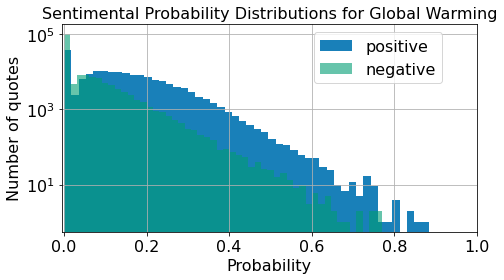

In [297]:
# Plotting Positive and Negative Probability Distributions

mpl.style.use('seaborn-colorblind')

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gw_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

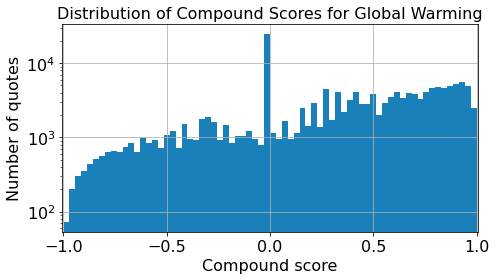

In [298]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Global Warming', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [192]:
positive_gw=gw_sent[gw_sent['compound scores']>=0.05]
negative_gw=gw_sent[gw_sent['compound scores']<=-0.05]
neutral_gw=gw_sent[np.abs(gw_sent['compound scores']) < 0.05]

In [300]:
neutral_gw.describe()

,positive scores,negative scores,compound scores
count,26380.000000,26380.000000,26380.000000
mean,0.010279,0.009411,0.000332
std,0.033114,0.031387,0.008413
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.388000,0.324000,0.049800


In [301]:
positive_gw.describe()

,positive scores,negative scores,compound scores
count,110164.000000,110164.000000,110164.000000
mean,0.185977,0.018335,0.601341
std,0.095838,0.034598,0.258020
min,0.014000,0.000000,0.050000
25%,0.114000,0.000000,0.381800
50%,0.171000,0.000000,0.636900
75%,0.241000,0.029000,0.831600
max,0.884000,0.343000,0.998800


In [302]:
negative_gw.describe()

,positive scores,negative scores,compound scores
count,29821.000000,29821.000000,29821.000000
mean,0.042987,0.146590,-0.423574
std,0.050780,0.081922,0.236398
min,0.000000,0.012000,-0.998500
25%,0.000000,0.088000,-0.599400
50%,0.031000,0.129000,-0.381800
75%,0.075000,0.185000,-0.249800
max,0.419000,0.770000,-0.050000


In [303]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gw.shape[0],round(positive_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gw.shape[0],round(negative_gw.shape[0]*100/gw_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gw.shape[0], round(neutral_gw.shape[0]*100/gw_sent.shape[0],2)))

Number of quotes with a positive sentiment: 110164 (66.22 %)
Number of quotes with a negative sentiment: 29821 (17.93 %)
Number of quotes with a neutral sentiment: 26380 (15.86 %)


In [304]:
# Exracting example
#neutral_gw[neutral_gw['compound scores'] == neutral_gw['compound scores'].min()]['quotation']
neutral_gw.iloc[4]['quotation']

'Temperatures go up every year, so we got to try and mitigate that,'

### Abortion


In [305]:
ab_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
1400011,2015-12-09-139783,"will push for energy development, beefed-up la...",Victor Davis Hanson,['Q1276395'],2015-12-09 06:33:51,"[['Victor Davis Hanson', '0.7887'], ['None', '...",0.064,0.104,-0.5719,2015,12,201512
1401214,2015-09-04-095700,"The revered Mother Teresa, who works in the st...",None,[],2015-09-04 21:09:20,"[['None', '0.8472'], ['Al Gore', '0.0952'], ['...",0.169,0.065,0.8350,2015,09,201509
1404392,2015-05-13-068629,We got done and she was standing on her head i...,Dennis Rodman,['Q201608'],2015-05-13 16:50:41,"[['Dennis Rodman', '0.6836'], ['Carmen Electra...",0.124,0.000,0.6249,2015,05,201505
1406420,2015-01-09-091216,while African Americans make up just 13 percen...,None,[],2015-01-09 23:38:13,"[['None', '0.9263'], ['Alveda King', '0.0737']]",0.000,0.000,0.0000,2015,01,201501
1409432,2015-09-23-016630,Conservatives worry about the way he seems to ...,Robert Royal,"['Q7349412', 'Q7349413']",2015-09-23 16:35:22,"[['Robert Royal', '0.8235'], ['None', '0.1318'...",0.092,0.249,-0.6486,2015,09,201509


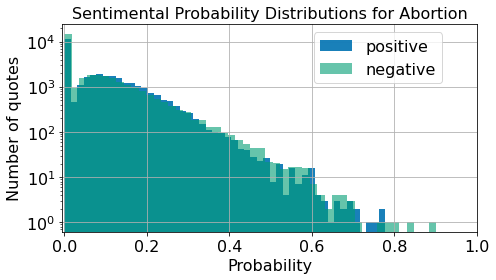

In [306]:
# Plotting Positive and Negative Probability Distributions
fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(ab_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

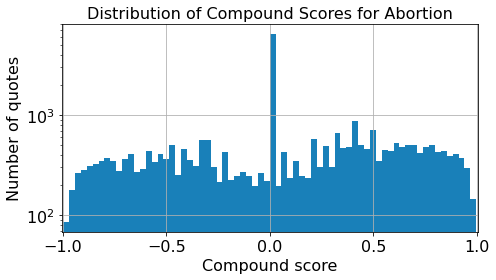

In [307]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(ab_sent['compound scores'], bins = 70, alpha=0.9)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Abortion', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [193]:
positive_ab=ab_sent[ab_sent['compound scores']>=0.05]
negative_ab=ab_sent[ab_sent['compound scores']<=-0.05]
neutral_ab=ab_sent[np.abs(ab_sent['compound scores'])< 0.05]

In [309]:
neutral_ab.describe()

,positive scores,negative scores,compound scores
count,6801.000000,6801.000000,6801.000000
mean,0.010469,0.009852,0.000155
std,0.035739,0.034280,0.008437
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.358000,0.344000,0.049800


In [310]:
positive_ab.describe()

,positive scores,negative scores,compound scores
count,14568.000000,14568.000000,14568.000000
mean,0.169490,0.031016,0.519866
std,0.091705,0.045643,0.249167
min,0.013000,0.000000,0.050000
25%,0.103750,0.000000,0.328375
50%,0.153000,0.000000,0.510600
75%,0.216000,0.058000,0.726900
max,0.778000,0.413000,0.996900


In [311]:
negative_ab.describe()

,positive scores,negative scores,compound scores
count,10997.000000,10997.000000,10997.000000
mean,0.041669,0.178907,-0.507684
std,0.052215,0.100372,0.251306
min,0.000000,0.012000,-0.998700
25%,0.000000,0.107000,-0.718400
50%,0.000000,0.158000,-0.497600
75%,0.075000,0.227000,-0.296000
max,0.338000,0.902000,-0.050700


In [312]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_ab.shape[0],round(positive_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_ab.shape[0],round(negative_ab.shape[0]*100/ab_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_ab.shape[0], round(neutral_ab.shape[0]*100/ab_sent.shape[0],2)))

Number of quotes with a positive sentiment: 14568 (45.01 %)
Number of quotes with a negative sentiment: 10997 (33.98 %)
Number of quotes with a neutral sentiment: 6801 (21.01 %)


### Gender Inequality

In [313]:
gi_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
3900322,2019-08-12-051728,Not only winning the World Cup with her amazin...,Taylor Swift,['Q26876'],2019-08-12 12:55:41,"[['Taylor Swift', '0.9038'], ['None', '0.0799'...",0.177,0.088,0.6717,2019,08,201908
3900920,2019-01-23-074654,"Our main mission is to breach the gender gap,",None,[],2019-01-23 05:46:04,"[['None', '0.9186'], ['Chang Liu', '0.0814']]",0.000,0.000,0.0000,2019,01,201901
3902699,2019-12-19-020869,"Growing up in Pakistan, I was a feminist befor...",Ziauddin Yousafzai,['Q8071389'],2019-12-19 17:03:35,"[['Ziauddin Yousafzai', '0.7561'], ['None', '0...",0.149,0.070,0.2144,2019,12,201912
3904083,2019-03-28-032705,"I didn't think I was breaking a trade secret, ...",Piers Morgan,['Q557758'],2019-03-28 04:09:36,"[['Piers Morgan', '0.8436'], ['None', '0.1361'...",0.000,0.000,0.0000,2019,03,201903
3904546,2019-01-25-095509,"The thing about misogyny is everyone does it,",None,[],2019-01-25 21:18:53,"[['None', '0.8255'], ['Karen Carpenter', '0.11...",0.000,0.000,0.0000,2019,01,201901


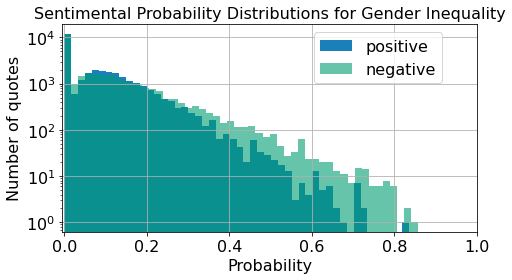

In [314]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


None

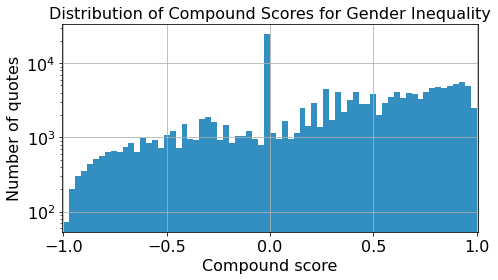

In [315]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gender Inequality', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [194]:
positive_gi=gi_sent[gi_sent['compound scores']>=0.05]
negative_gi=gi_sent[gi_sent['compound scores']<=-0.05]
neutral_gi=gi_sent[np.abs(gi_sent['compound scores'])< 0.05]

In [317]:
neutral_gi.describe()

,positive scores,negative scores,compound scores
count,5866.000000,5866.000000,5866.000000
mean,0.011061,0.010896,-0.000063
std,0.037339,0.036486,0.008252
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.321000,0.347000,0.049800


In [318]:
positive_gi.describe()

,positive scores,negative scores,compound scores
count,12594.000000,12594.000000,12594.000000
mean,0.172278,0.035152,0.539809
std,0.095089,0.047189,0.257657
min,0.018000,0.000000,0.050000
25%,0.104000,0.000000,0.340000
50%,0.153000,0.000000,0.540950
75%,0.219000,0.062000,0.764400
max,0.835000,0.360000,0.997700


In [319]:
negative_gi.describe()

,positive scores,negative scores,compound scores
count,12805.000000,12805.000000,12805.000000
mean,0.042013,0.208127,-0.545223
std,0.053827,0.123236,0.262920
min,0.000000,0.017000,-0.997600
25%,0.000000,0.120000,-0.771300
50%,0.000000,0.180000,-0.571900
75%,0.077000,0.264000,-0.339200
max,0.412000,0.858000,-0.050200


In [320]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gi.shape[0],round(positive_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gi.shape[0],round(negative_gi.shape[0]*100/gi_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gi.shape[0], round(neutral_gi.shape[0]*100/gi_sent.shape[0],2)))

Number of quotes with a positive sentiment: 12594 (40.28 %)
Number of quotes with a negative sentiment: 12805 (40.96 %)
Number of quotes with a neutral sentiment: 5866 (18.76 %)


### Gun Control

In [321]:
gc_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year,month,year-month
Unnamed: 0,,,,,,,,,,,,
408,2015-12-15-002818,a vitriolic attack on the twin pillars of Amer...,None,[],2015-12-15 07:34:41,"[['None', '0.5739'], ['Dana Loesch', '0.4261']]",0.188,0.277,-0.2500,2015,12,201512
3089,2015-02-20-038705,I'm in favor of students who have their concea...,Cary Smith,"['Q5047652', 'Q5047654']",2015-02-20 00:51:00,"[['Cary Smith', '0.7423'], ['None', '0.1626'],...",0.192,0.000,0.6124,2015,02,201502
7977,2015-09-19-042453,"scary sounding phrases like `assault weapons,'...",Donald Trump,"['Q22686', 'Q27947481']",2015-09-19 05:27:02,"[['Donald Trump', '0.7814'], ['None', '0.2186']]",0.095,0.561,-0.9042,2015,09,201509
8264,2015-10-13-054087,"It is a constitutionally-protected right, like...",Wendy Davis,"['Q3539529', 'Q47358063', 'Q59160484', 'Q79826...",2015-10-13 23:31:37,"[['Wendy Davis', '0.7397'], ['None', '0.2302']...",0.098,0.000,0.3612,2015,10,201510
11789,2015-04-19-040043,"This country, and especially the State of Texa...",None,[],2015-04-19 16:50:49,"[['None', '0.6643'], ['President Obama', '0.26...",0.117,0.161,-0.4449,2015,04,201504


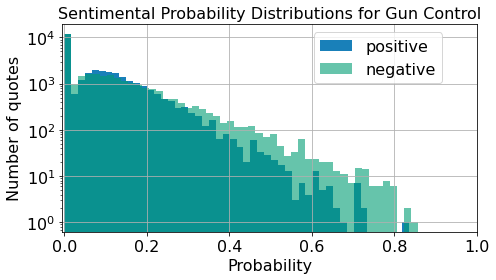

In [322]:
# Plotting Positive and Negative Probability Distributions

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gi_sent['positive scores'],label='positive', bins = 50, alpha=0.9)
plt.hist(gi_sent['negative scores'],label='negative', bins = 50, alpha=0.6)
plt.xlabel('Probability',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-0.005,1])
plt.title('Sentimental Probability Distributions for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.4, 0.4, 0.5, 0.5))

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()


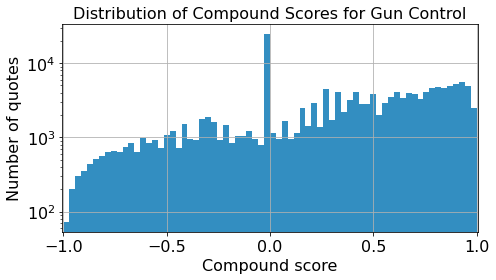

In [323]:
# Plotting the Compound Scores

fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(1, 1, 1)

plt.hist(gw_sent['compound scores'], bins = 70, alpha=0.8)
plt.xlabel('Compound score',fontsize = 16)
plt.ylabel('Number of quotes',fontsize = 16)
plt.xlim([-1.005,1.005])
plt.title('Distribution of Compound Scores for Gun Control', fontsize = 16)
plt.grid()
ax.set_yscale('log')

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

In [195]:
positive_gc=gc_sent[gc_sent['compound scores']>=0.05]
negative_gc=gc_sent[gc_sent['compound scores']<=-0.05]
neutral_gc=gc_sent[np.abs(gc_sent['compound scores'])< 0.05]

In [325]:
neutral_gc.describe()

,positive scores,negative scores,compound scores
count,1819.000000,1819.000000,1819.000000
mean,0.032789,0.032465,0.000151
std,0.062027,0.061559,0.013459
min,0.000000,0.000000,-0.049800
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.049500,0.048500,0.000000
max,0.321000,0.312000,0.049800


In [326]:
positive_gc.describe()

,positive scores,negative scores,compound scores
count,6244.000000,6244.000000,6244.000000
mean,0.191861,0.056182,0.494335
std,0.093287,0.062029,0.259323
min,0.020000,0.000000,0.050000
25%,0.124000,0.000000,0.273200
50%,0.175000,0.046000,0.486250
75%,0.244000,0.096000,0.709600
max,0.636000,0.338000,0.994400


In [327]:
negative_gc.describe()

,positive scores,negative scores,compound scores
count,10289.000000,10289.000000,10289.000000
mean,0.050132,0.237751,-0.586073
std,0.058104,0.127675,0.257664
min,0.000000,0.020000,-0.998700
25%,0.000000,0.145000,-0.822100
50%,0.035000,0.211000,-0.612400
75%,0.088000,0.300000,-0.340000
max,0.476000,0.906000,-0.050500


In [328]:
# print total number of positive, negative and neutral quotes
print('Number of quotes with a positive sentiment: {0} ({1} %)'.format(positive_gc.shape[0],round(positive_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a negative sentiment: {0} ({1} %)'.format(negative_gc.shape[0],round(negative_gc.shape[0]*100/gc_sent.shape[0],2)))
print('Number of quotes with a neutral sentiment: {0} ({1} %)'.format(neutral_gc.shape[0], round(neutral_gc.shape[0]*100/gc_sent.shape[0],2)))

Number of quotes with a positive sentiment: 6244 (34.02 %)
Number of quotes with a negative sentiment: 10289 (56.06 %)
Number of quotes with a neutral sentiment: 1819 (9.91 %)


#### Overall data

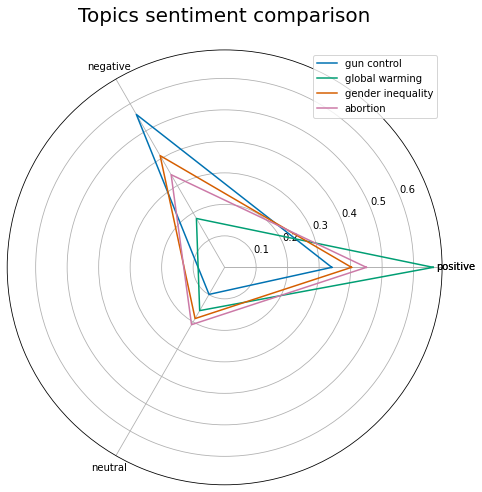

In [329]:
categories = ['positive','negative','neutral']
categories = [*categories, categories[0]]

gc_stat = [positive_gc.shape[0]/gc_sent.shape[0],negative_gc.shape[0]/gc_sent.shape[0],neutral_gc.shape[0]/gc_sent.shape[0]]
gw_stat = [positive_gw.shape[0]/gw_sent.shape[0],negative_gw.shape[0]/gw_sent.shape[0],neutral_gw.shape[0]/gw_sent.shape[0]]
gi_stat = [positive_gi.shape[0]/gi_sent.shape[0],negative_gi.shape[0]/gi_sent.shape[0],neutral_gi.shape[0]/gi_sent.shape[0]]
ab_stat = [positive_ab.shape[0]/ab_sent.shape[0],negative_ab.shape[0]/ab_sent.shape[0],neutral_ab.shape[0]/ab_sent.shape[0]]

gc_stat = [*gc_stat, gc_stat[0]]
gw_stat = [*gw_stat, gw_stat[0]]
gi_stat = [*gi_stat, gi_stat[0]]
ab_stat = [*ab_stat, ab_stat[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(gc_stat))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, gc_stat, label='gun control')
plt.plot(label_loc, gw_stat, label='global warming')
plt.plot(label_loc, gi_stat, label='gender inequality')
plt.plot(label_loc, ab_stat, label='abortion')
plt.title('Topics sentiment comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

## Analysis over the years

### Global warming

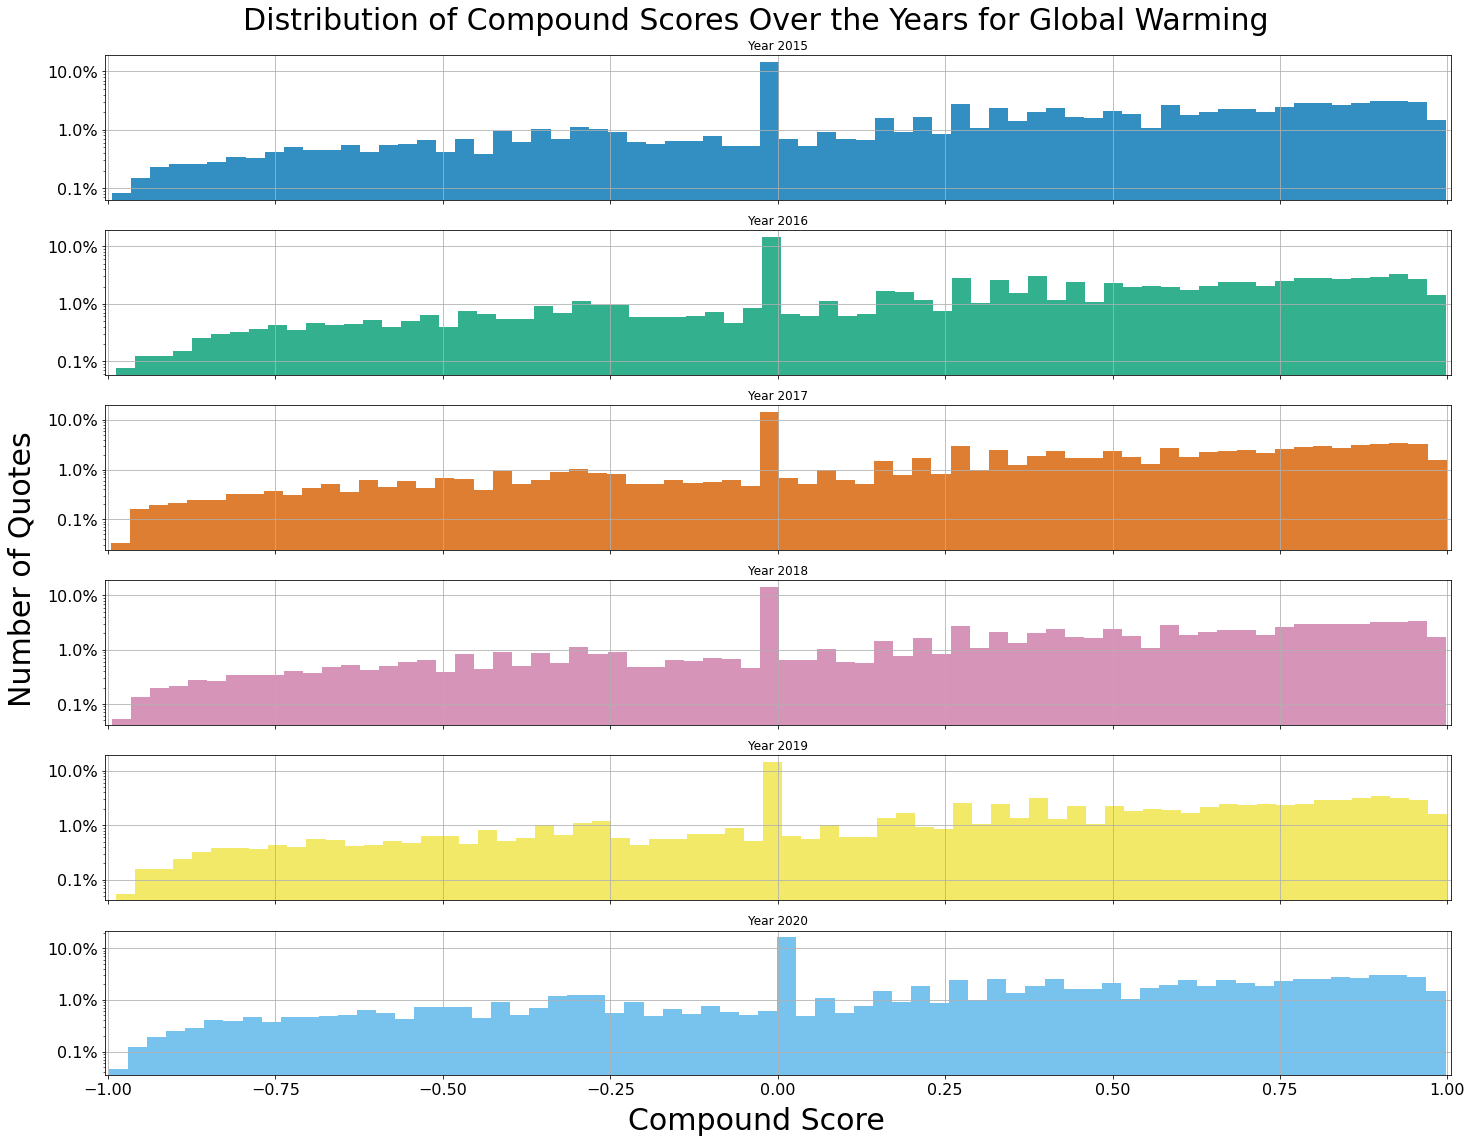

In [330]:
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    weight = np.ones(gw_sent[gw_sent['year']==s]['compound scores'].shape[0]) / gw_sent[gw_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gw_sent[gw_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Global Warming', fontsize = 30, x=0.5, y=1.02)
None

In [331]:
gw_sent.groupby(['year', 'month']).count()

quoteID  quotation  speaker  qids  date  probas  positive scores  \
year month                                                                     
2015 01        2925       2925     2925  2925  2925    2925             2925   
     02        2977       2977     2977  2977  2977    2977             2977   
     03        3119       3119     3119  3119  3119    3119             3119   
     04        2511       2511     2511  2511  2511    2511             2511   
     05        1911       1911     1911  1911  1911    1911             1911   
...             ...        ...      ...   ...   ...     ...              ...   
2019 12        2627       2627     2627  2627  2627    2627             2627   
2020 01        8002       8002     8002  8002  8002    8002             8002   
     02        7097       7097     7097  7097  7097    7097             7097   
     03        4742       4742     4742  4742  4742    4742             4742   
     04        1773       1773     1773  1773  1773    1773             1773   

            negative scores  compound scores  year-month  
year month                                                
2015 01                2925             2925        2925  
     02                2977             2977        2977  
     03                3119             3119        3119  
     04                2511             2511        2511  
     05                1911             1911        1911  
...                     ...              ...         ...  
2019 12                2627             2627        2627  
2020 01                8002             8002        8002  
     02                7097             7097        7097  
     03                4742             4742        4742  
     04                1773             1773        1773  

[64 rows x 10 columns]

### Abortion

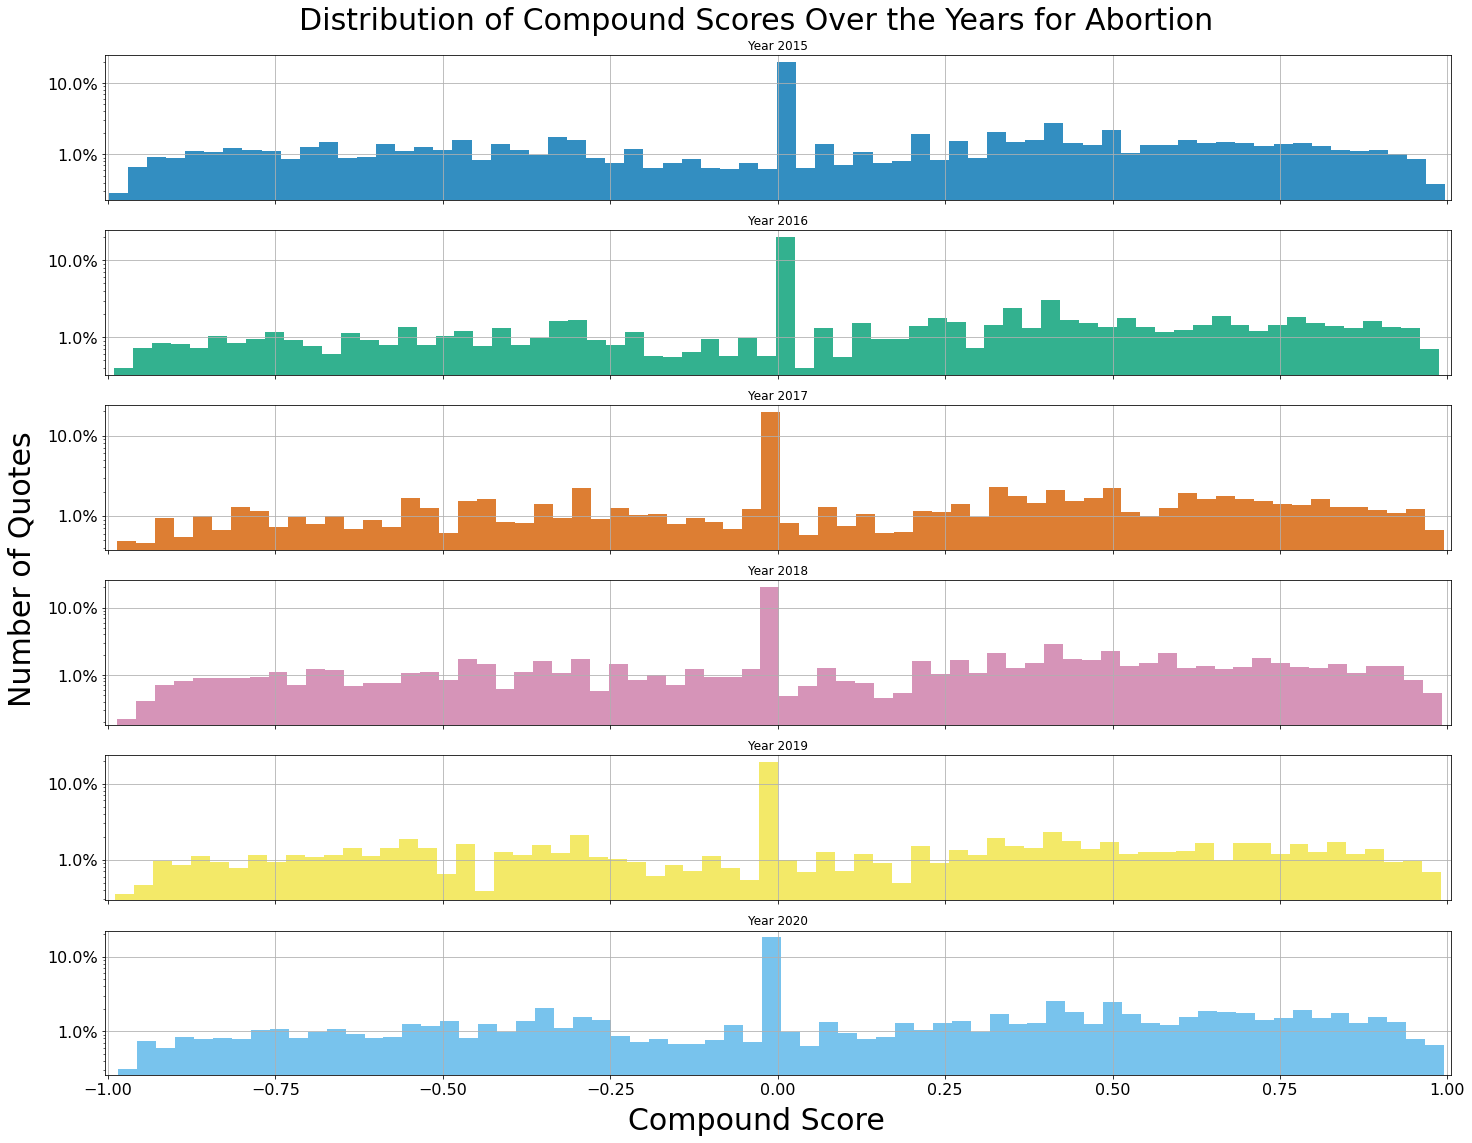

In [332]:
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    weight = np.ones(ab_sent[ab_sent['year']==s]['compound scores'].shape[0]) / ab_sent[ab_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(ab_sent[ab_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Abortion', fontsize = 30, x=0.5, y=1.02)
None

In [333]:
ab_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,16589,16589,16589,16589,16589,16589,16589,16589,16589,16589,16589
2016,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296
2017,3309,3309,3309,3309,3309,3309,3309,3309,3309,3309,3309
2018,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230,2230
2019,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801
2020,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141


### Gender Inequality

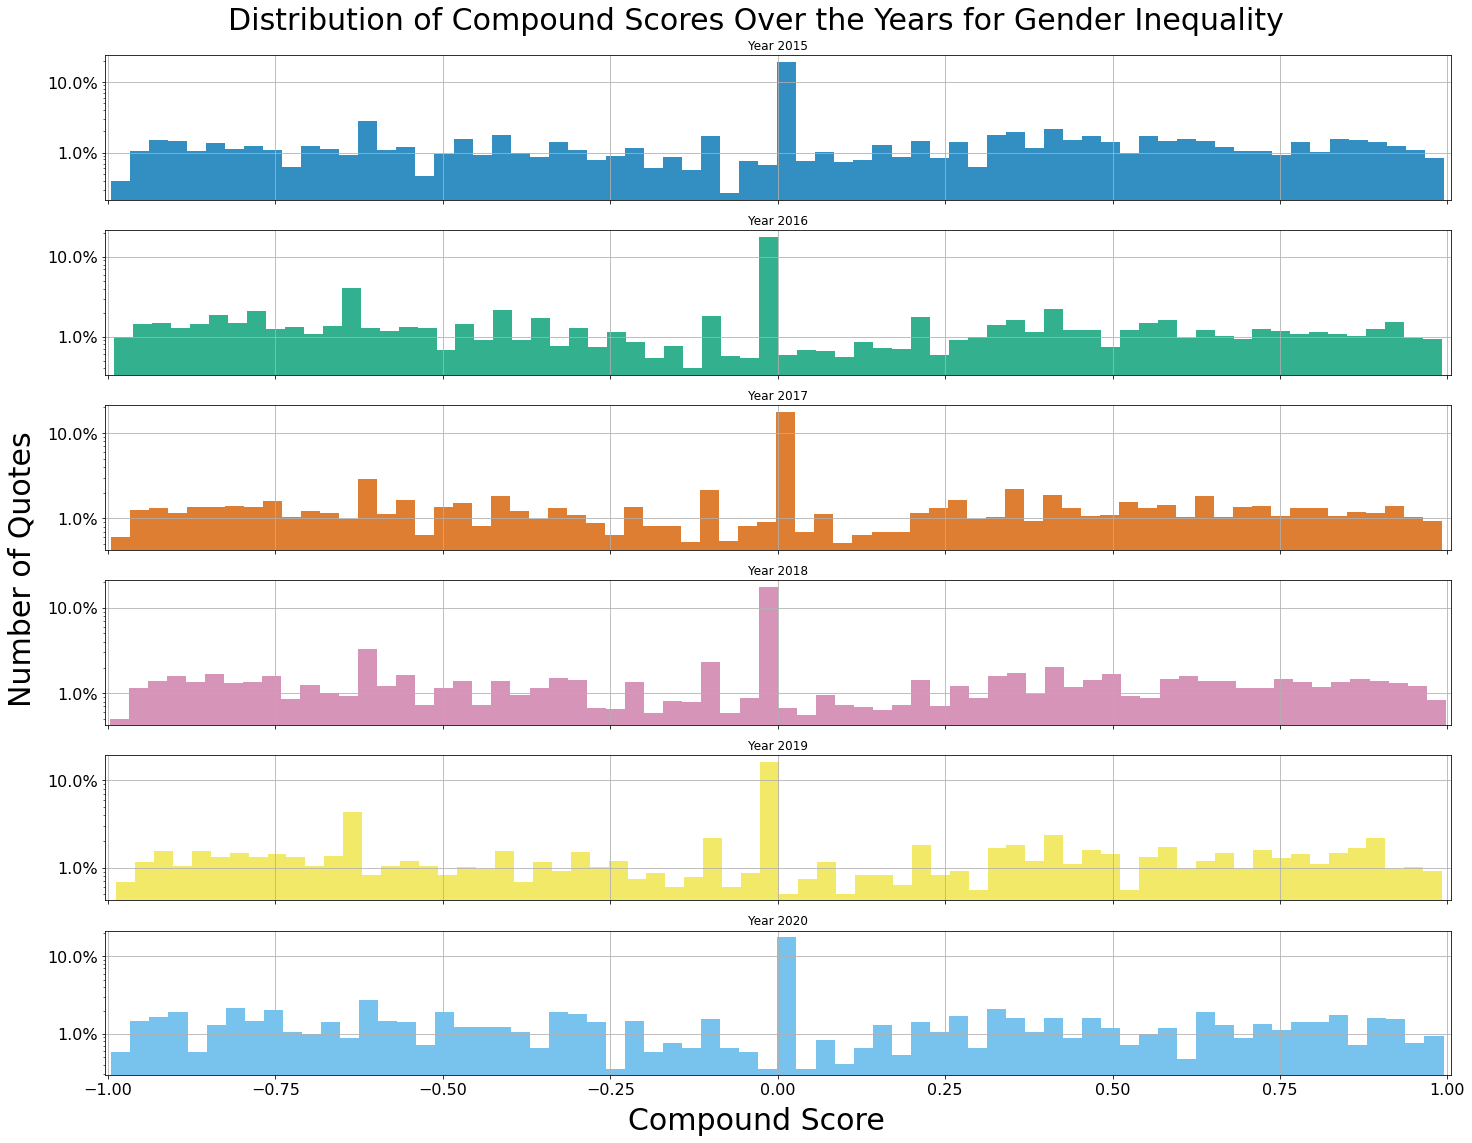

In [334]:
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    weight = np.ones(gi_sent[gi_sent['year']==s]['compound scores'].shape[0]) / gi_sent[gi_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gi_sent[gi_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Gender Inequality', fontsize = 30, x=0.5, y=1.02)
None

In [335]:
gi_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011,3011
2016,5229,5229,5229,5229,5229,5229,5229,5229,5229,5229,5229
2017,6488,6488,6488,6488,6488,6488,6488,6488,6488,6488,6488
2018,12669,12669,12669,12669,12669,12669,12669,12669,12669,12669,12669
2019,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174
2020,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694


### Gun Control

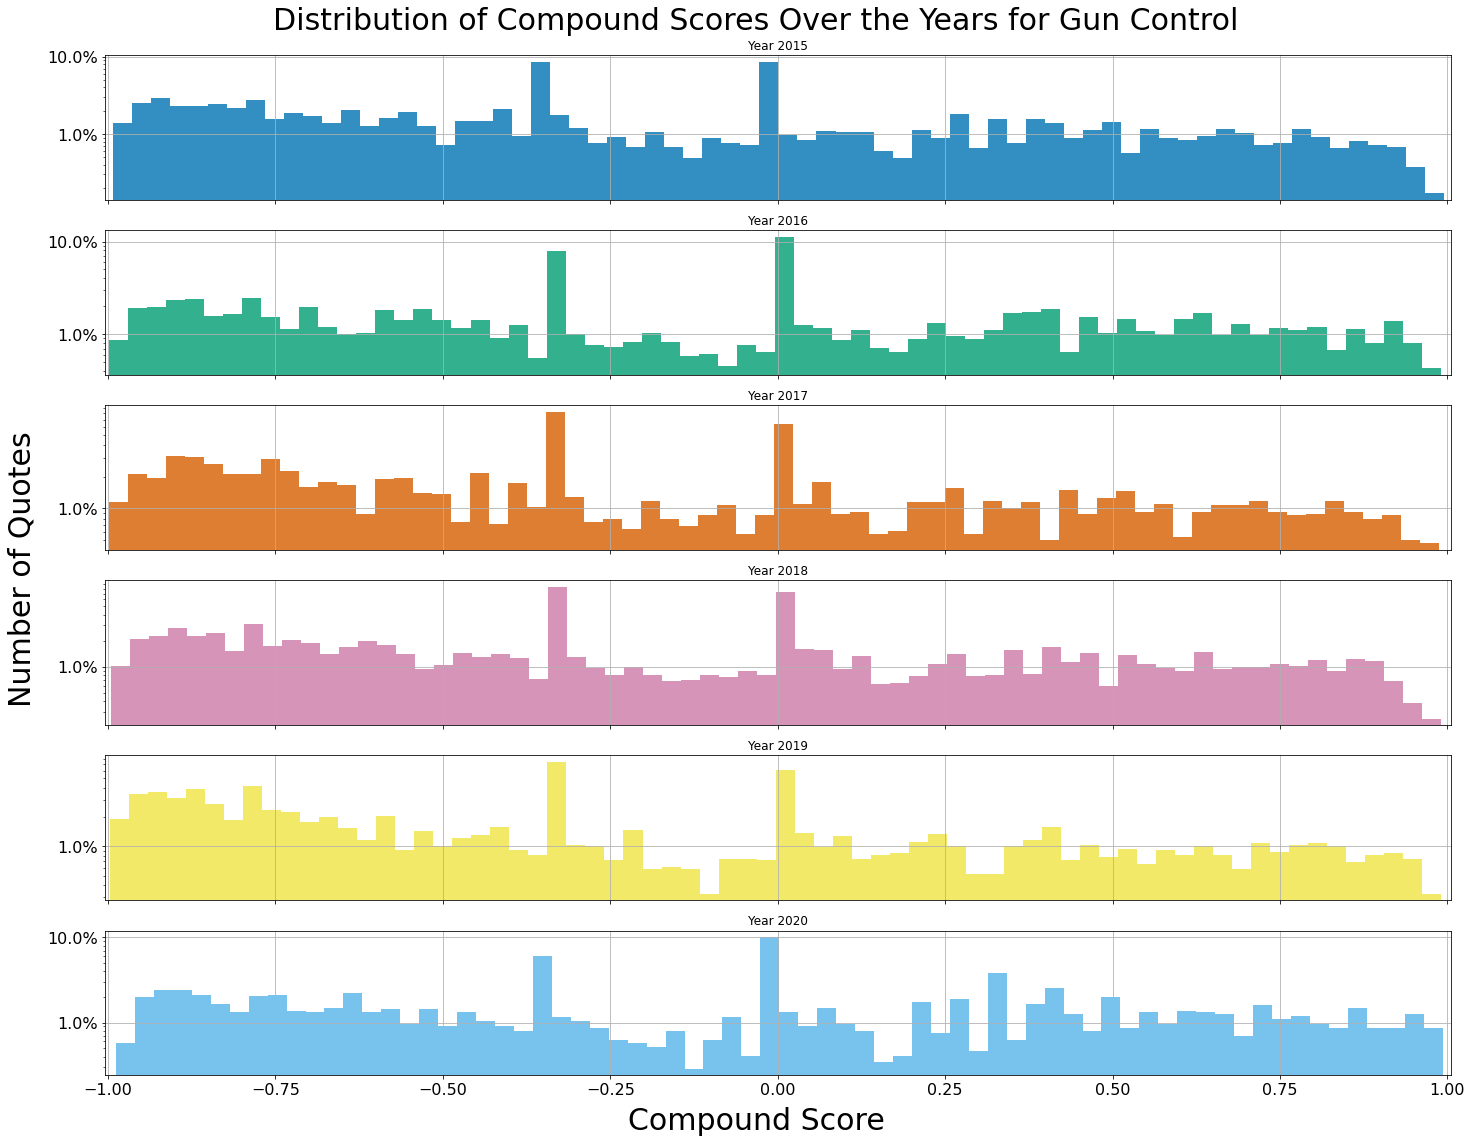

In [336]:
fig, axs = plt.subplots(6,figsize=(20,15), sharex=True)
for i in range(6):
    s=str(2015+i)
    weight = np.ones(gc_sent[gc_sent['year']==s]['compound scores'].shape[0]) / gc_sent[gc_sent['year']==s]['compound scores'].shape[0]
    axs[i].hist(gc_sent[gc_sent['year']==s]['compound scores'], bins=70, alpha = 0.8, color = 'C'+str(i),weights = weight)
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].title.set_text('Year '+ s)
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
# Setting xlabel, ylabel
fig.text(0.5, -0.02, 'Compound Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores Over the Years for Gun Control', fontsize = 30, x=0.5, y=1.02)
None

In [337]:
gc_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,month,year-month
year,,,,,,,,,,,
2015,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
2016,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275,3275
2017,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801
2018,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968,3968
2019,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072,3072
2020,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743,1743


### Overall years

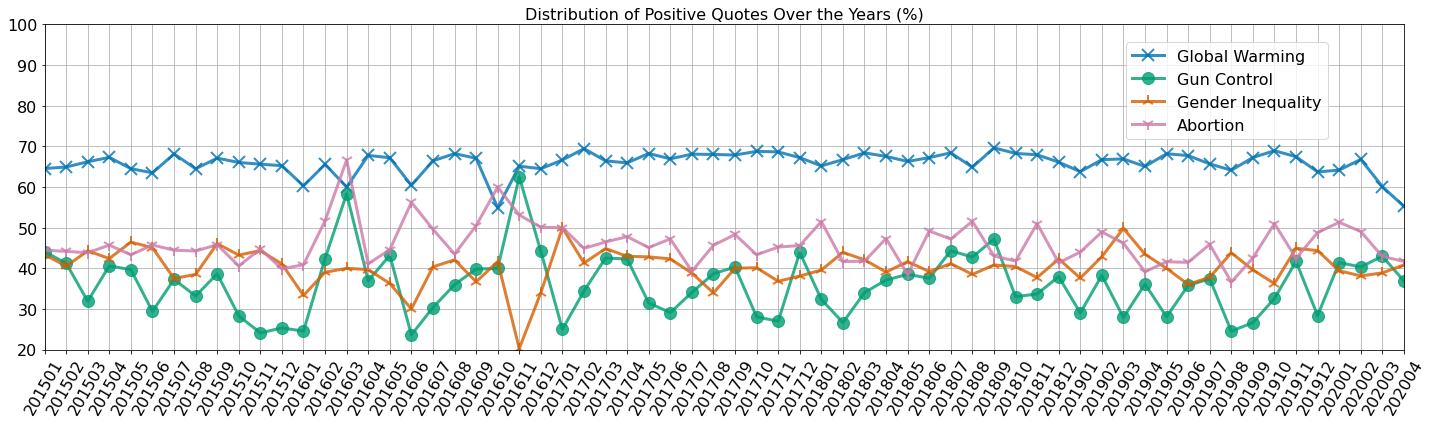

In [338]:
plt.figure(figsize=(20,6))
plt.plot(100*positive_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*positive_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8,marker = 'o', markersize=12)
plt.plot(100*positive_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8, marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*positive_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8, marker='1', markersize=12, markeredgewidth =2)
plt.title('Distribution of Positive Quotes Over the Years (%)', fontsize=16)
plt.grid()

plt.xlim(['201501','202004'])
plt.xticks(rotation=60)
plt.ylim([20,100])

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.43, 0.41, 0.5, 0.5), numpoints = 1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

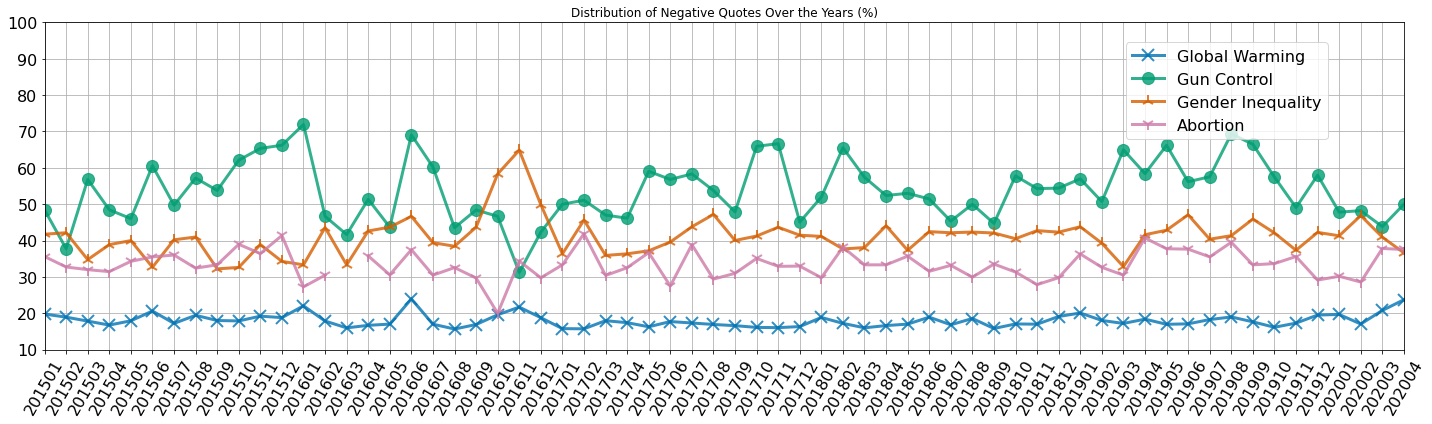

In [339]:
plt.figure(figsize=(20,6))
plt.plot(100*negative_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*negative_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8 ,marker = 'o', markersize=12)
plt.plot(100*negative_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8,  marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*negative_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8,  marker = '1', markersize=12, markeredgewidth =2)
plt.title('Distribution of Negative Quotes Over the Years (%)')
plt.grid()
plt.ylim([10,100])
plt.xlim(['201501','202004'])

plt.xticks(rotation=60)


# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.43, 0.41, 0.5, 0.5), numpoints=1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()

None

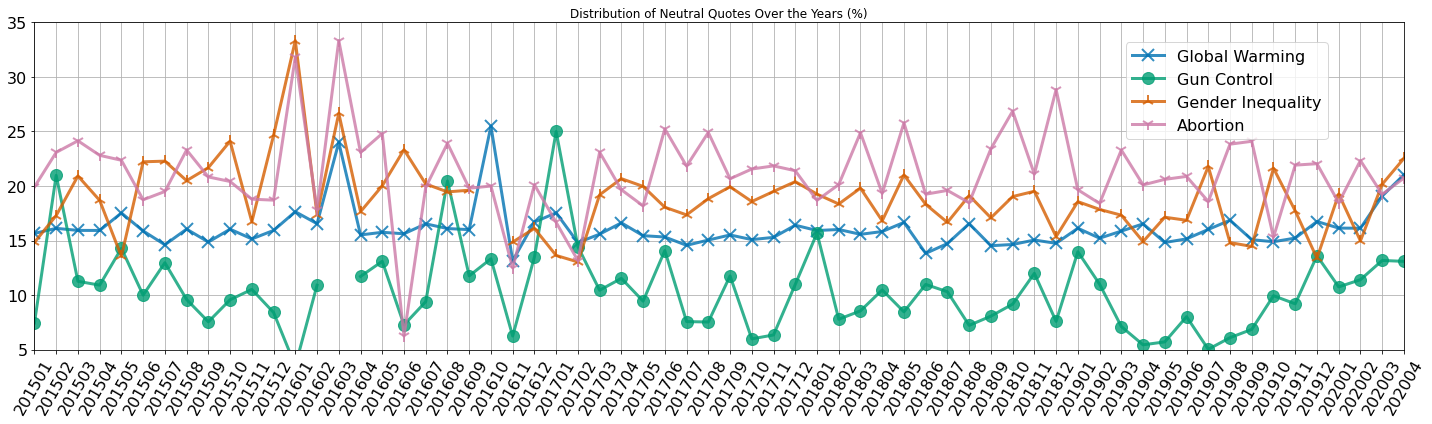

In [340]:
plt.figure(figsize=(20,6))
plt.plot(100*neutral_gw.groupby('year-month').count()['quotation']/gw_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Global Warming', alpha = 0.8, marker = 'x', markersize=12, markeredgewidth =2)
plt.plot(100*neutral_gc.groupby('year-month').count()['quotation']/gc_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gun Control', alpha = 0.8 ,marker = 'o', markersize=12)
plt.plot(100*neutral_gi.groupby('year-month').count()['quotation']/gi_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Gender Inequality', alpha = 0.8,  marker = '2', markersize=12, markeredgewidth =2)
plt.plot(100*neutral_ab.groupby('year-month').count()['quotation']/ab_sent.groupby('year-month').count()['quotation'], linewidth=3, label = 'Abortion', alpha = 0.8,  marker = '1', markersize=12, markeredgewidth =2)
plt.title('Distribution of Neutral Quotes Over the Years (%)')
plt.grid()
plt.ylim([5,35])
plt.xlim(['201501','202004'])
plt.xticks(rotation=60)

# this controls where you put the legend with bbox_to_anchor
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.43, 0.41, 0.5, 0.5), numpoints=1)

# this controls the grid labels size
plt.tick_params(axis='both', which='major', labelsize=16)

# this makes the plot tight
plt.tight_layout()
None

## Analysis over the speaker attributes

In [196]:
#Merging information about speakers with sentimental analysis results
gw_at=gw.merge(gw_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gi_at=gi.merge(gi_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
gc_at=gc.merge(gc_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()
ab_at=ab.merge(ab_sent[['quotation', 'speaker','positive scores', 'negative scores', 'compound scores']],how='left',left_on=['quotation','speaker'],right_on=['quotation','speaker']).copy()

### Global warming

In [197]:
gw_at.head(5)

,quotation,speaker,qids,numOccurrences,urls,gender,nationality,ethnic_group,academic_degree,religion,year,positive scores,negative scores,compound scores
0,365 degrees is above the glass transition phas...,Tim Moore,"['Q16123784', 'Q16732824', 'Q7804002', 'Q78040...",1,['http://www.thefashionspot.com/beauty/637227-...,['Q6581097'],['Q408'],NaN,NaN,NaN,2015,0.067,0.137,-0.4945
1,If the BDS is unstable at typical storage temp...,Don Potter,['Q1239428'],1,['http://www.pharmpro.com/article/2015/12/sing...,['Q6581097'],['Q30'],NaN,NaN,NaN,2015,0.061,0.045,-0.0258
2,It's been used by mankind for centuries and re...,Derek Thomas,"['Q20177497', 'Q5262399', 'Q5262400', 'Q573132...",2,['http://www.marketwired.com/mw/release.do?id=...,['Q6581097'],['Q30'],NaN,NaN,NaN,2015,0.151,0.023,0.9153
3,It's very important to understand how the ocea...,Helen McGregor,"['Q17517203', 'Q5702816']",2,['http://www.azocleantech.com/news.aspx?newsID...,['Q6581072'],['Q408'],NaN,NaN,NaN,2015,0.086,0.056,0.1513
4,Our new methods will hopefully translate into ...,Justin Siegel,['Q23035995'],2,['http://phys.org/news/2015-11-microbes-protei...,['Q6581097'],NaN,NaN,NaN,NaN,2015,0.318,0.000,0.6808


In [343]:
gw_at.groupby('gender').count()

,quotation,speaker,qids,numOccurrences,urls,nationality,ethnic_group,academic_degree,religion,year,positive scores,negative scores,compound scores
gender,,,,,,,,,,,,,
['Q1052281' 'Q6581097'],3,3,3,3,3,3,0,0,0,3,3,3,3
['Q1052281'],24,24,24,24,24,24,0,0,2,24,19,19,19
['Q18116794'],5,5,5,5,5,5,0,0,5,5,3,3,3
['Q1984232'],7,7,7,7,7,7,0,0,0,7,7,7,7
['Q2449503'],3,3,3,3,3,3,0,0,0,3,1,1,1
['Q48270'],6,6,6,6,6,5,0,0,0,6,6,6,6
['Q6581072'],17399,17399,17399,17399,17399,12603,622,754,1761,17399,15342,15342,15342
['Q6581097' 'Q179294'],3,3,3,3,3,3,0,0,0,3,1,1,1
['Q6581097' 'Q6581072'],6,6,6,6,6,4,0,0,0,6,6,6,6


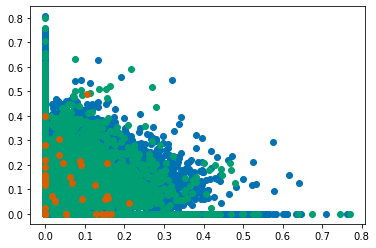

In [344]:
plt.scatter(gw_at[gw_at['gender']=='[\'Q6581097\']']['negative scores'], gw_at[gw_at['gender']=='[\'Q6581097\']']['positive scores'], color = 'C0')
plt.scatter(gw_at[gw_at['gender']=='[\'Q6581072\']']['negative scores'], gw_at[gw_at['gender']=='[\'Q6581072\']']['positive scores'], color = 'C1')
plt.scatter(gw_at[(gw_at['gender']!='[\'Q6581072\']') & (gw_at['gender']!='[\'Q6581097\']')]['negative scores'], gw_at[(gw_at['gender']!='[\'Q6581072\']') & (gw_at['gender']!='[\'Q6581097\']')]['positive scores'], color = 'C2')


None

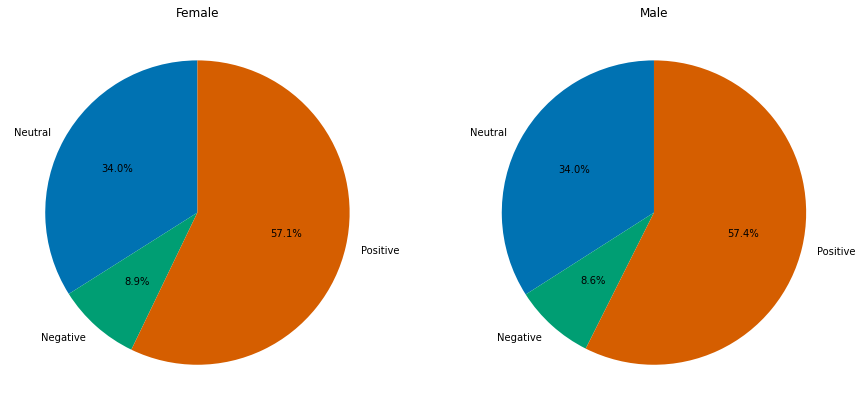

In [350]:
gw_at['sex']=gw_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gw_gen=gw_at[gw_at['sex'].isin(['male','female'])].copy()
positive_gw_gen=gw_gen[gw_gen['compound scores']>=0.05]
negative_gw_gen=gw_gen[gw_gen['compound scores']<=-0.05]
neutral_gw_gen=gw_gen[np.abs(gw_gen['compound scores'])< 0.05]

labels = ['Neutral', 'Negative','Positive']
sizes_f = [positive_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,negative_gw_gen.groupby('sex').count()['quotation'].female/gw_gen.groupby('sex').count()['quotation'].female,neutral_gw_gen.groupby('sex').count()['quotation'].female/neutral_gw_gen.groupby('sex').count()['quotation'].female]
sizes_m = [positive_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,negative_gw_gen.groupby('sex').count()['quotation'].male/gw_gen.groupby('sex').count()['quotation'].male,neutral_gw_gen.groupby('sex').count()['quotation'].male/neutral_gw_gen.groupby('sex').count()['quotation'].male]

fig=plt.subplots(1,2,figsize=(15,10))
plt.subplot(1, 2, 1)
plt.pie(sizes_f, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female')
plt.subplot(1, 2, 2)
plt.pie(sizes_m, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male')
plt.show()

### Abortion

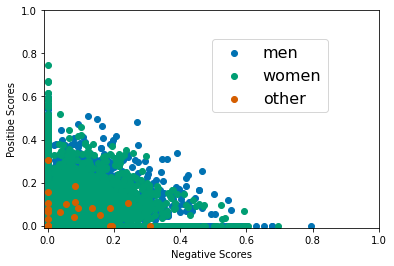

In [347]:
plt.scatter(ab_at[ab_at['gender']=='[\'Q6581097\']']['negative scores'], ab_at[ab_at['gender']=='[\'Q6581097\']']['positive scores'], color = 'C0', label = 'men')
plt.scatter(ab_at[ab_at['gender']=='[\'Q6581072\']']['negative scores'], ab_at[ab_at['gender']=='[\'Q6581072\']']['positive scores'], color = 'C1', label = 'women')
plt.scatter(ab_at[(ab_at['gender']!='[\'Q6581072\']') & (ab_at['gender']!='[\'Q6581097\']')]['negative scores'], ab_at[(ab_at['gender']!='[\'Q6581072\']') & (ab_at['gender']!='[\'Q6581097\']')]['positive scores'], color = 'C2', label = 'other')
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.3, 0.31, 0.5, 0.5), numpoints=1)
plt.xlabel('Negative Scores')
plt.ylabel('Positibe Scores')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1])

None


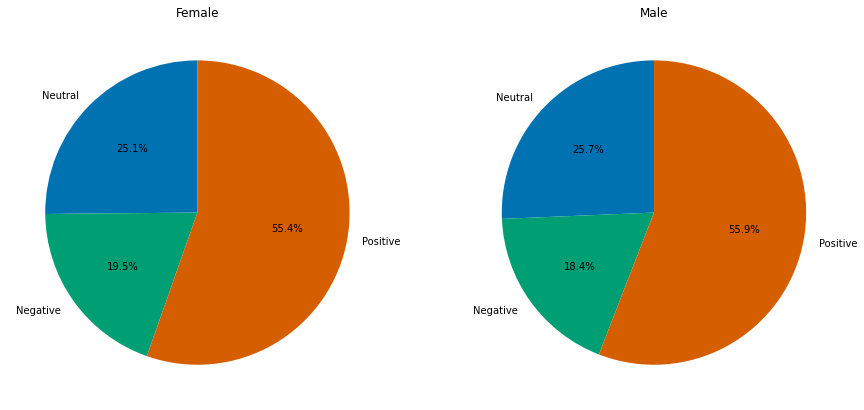

In [351]:
ab_at['sex']=ab_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
ab_gen=ab_at[ab_at['sex'].isin(['male','female'])].copy()
positive_ab_gen=ab_gen[ab_gen['compound scores']>=0.05]
negative_ab_gen=ab_gen[ab_gen['compound scores']<=-0.05]
neutral_ab_gen=ab_gen[np.abs(ab_gen['compound scores'])< 0.05]

labels = ['Neutral', 'Negative','Positive']
sizes_f = [positive_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,negative_ab_gen.groupby('sex').count()['quotation'].female/ab_gen.groupby('sex').count()['quotation'].female,neutral_ab_gen.groupby('sex').count()['quotation'].female/neutral_ab_gen.groupby('sex').count()['quotation'].female]
sizes_m = [positive_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,negative_ab_gen.groupby('sex').count()['quotation'].male/ab_gen.groupby('sex').count()['quotation'].male,neutral_ab_gen.groupby('sex').count()['quotation'].male/neutral_ab_gen.groupby('sex').count()['quotation'].male]

fig=plt.subplots(1,2,figsize=(15,10))
plt.subplot(1, 2, 1)
plt.pie(sizes_f, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female')
plt.subplot(1, 2, 2)
plt.pie(sizes_m, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male')
plt.show()


### Gender Inequality

Text(0, 0.5, 'Positibe Scores')

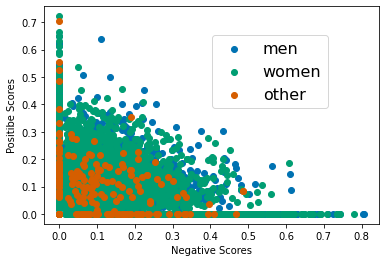

In [349]:
plt.scatter(gi_at[gi_at['gender']=='[\'Q6581097\']']['negative scores'], gi_at[gi_at['gender']=='[\'Q6581097\']']['positive scores'], color = 'C0', label = 'men')
plt.scatter(gi_at[gi_at['gender']=='[\'Q6581072\']']['negative scores'], gi_at[gi_at['gender']=='[\'Q6581072\']']['positive scores'], color = 'C1', label = 'women')
plt.scatter(gi_at[(gi_at['gender']!='[\'Q6581072\']') & (gi_at['gender']!='[\'Q6581097\']')]['negative scores'], gi_at[(gi_at['gender']!='[\'Q6581072\']') & (gi_at['gender']!='[\'Q6581097\']')]['positive scores'], color = 'C2', label = 'other')
plt.figlegend(ncol = 1,loc = 1, fontsize = 16, bbox_to_anchor=(0.3, 0.31, 0.5, 0.5), numpoints=1)
plt.xlabel('Negative Scores')
plt.ylabel('Positibe Scores')

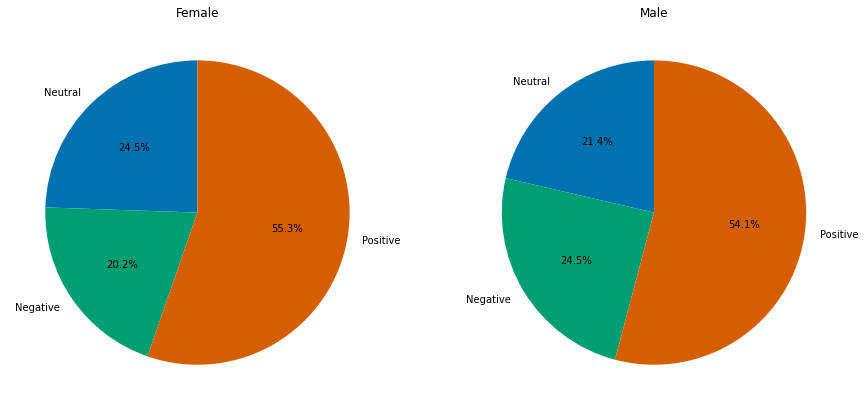

In [352]:
gi_at['sex']=gi_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gi_gen=gi_at[gi_at['sex'].isin(['male','female'])].copy()
positive_gi_gen=gi_gen[gi_gen['compound scores']>=0.05]
negative_gi_gen=gi_gen[gi_gen['compound scores']<=-0.05]
neutral_gi_gen=gi_gen[np.abs(gi_gen['compound scores'])< 0.05]

labels = ['Neutral', 'Negative','Positive']
sizes_f = [positive_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,negative_gi_gen.groupby('sex').count()['quotation'].female/gi_gen.groupby('sex').count()['quotation'].female,neutral_gi_gen.groupby('sex').count()['quotation'].female/neutral_gi_gen.groupby('sex').count()['quotation'].female]
sizes_m = [positive_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,negative_gi_gen.groupby('sex').count()['quotation'].male/gi_gen.groupby('sex').count()['quotation'].male,neutral_gi_gen.groupby('sex').count()['quotation'].male/neutral_gi_gen.groupby('sex').count()['quotation'].male]

fig=plt.subplots(1,2,figsize=(15,10))
plt.subplot(1, 2, 1)
plt.pie(sizes_f, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female')
plt.subplot(1, 2, 2)
plt.pie(sizes_m, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male')
plt.show()

### Gun Control

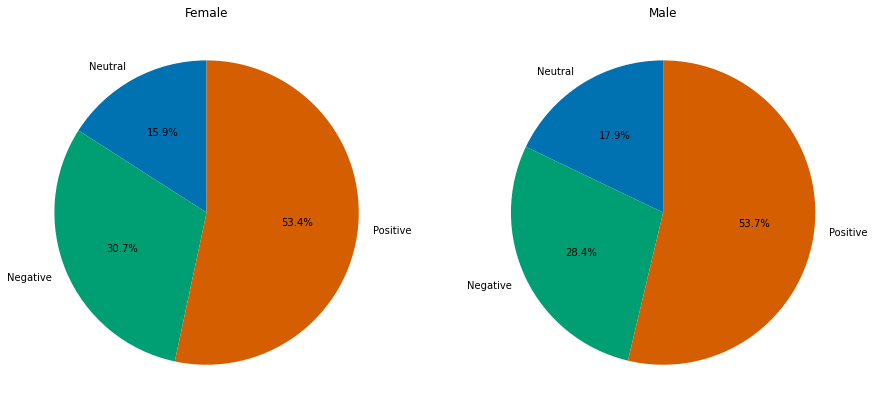

In [353]:
gc_at['sex']=gc_at['gender'].apply(lambda x: 'male' if x=='[\'Q6581097\']' else 'female').copy()
gc_gen=gc_at[gc_at['sex'].isin(['male','female'])].copy()
positive_gc_gen=gc_gen[gc_gen['compound scores']>=0.05]
negative_gc_gen=gc_gen[gc_gen['compound scores']<=-0.05]
neutral_gc_gen=gc_gen[np.abs(gc_gen['compound scores'])< 0.05]

labels = ['Neutral', 'Negative','Positive']
sizes_f = [positive_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,negative_gc_gen.groupby('sex').count()['quotation'].female/gc_gen.groupby('sex').count()['quotation'].female,neutral_gc_gen.groupby('sex').count()['quotation'].female/neutral_gc_gen.groupby('sex').count()['quotation'].female]
sizes_m = [positive_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,negative_gc_gen.groupby('sex').count()['quotation'].male/gc_gen.groupby('sex').count()['quotation'].male,neutral_gc_gen.groupby('sex').count()['quotation'].male/neutral_gc_gen.groupby('sex').count()['quotation'].male]

fig=plt.subplots(1,2,figsize=(15,10))
plt.subplot(1, 2, 1)
plt.pie(sizes_f, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female')
plt.subplot(1, 2, 2)
plt.pie(sizes_m, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male')
plt.show()

#### Splitting over attributes

In [519]:
#academic degrees
bach=['Q1765120','Q163727','Q787674','Q798137','Q10752757','Q2085288','Q4838827','Q56760985']
mas=['Q191701','Q950900','Q183816','Q4175466','Q1907865','Q6785201','Q2091008','Q3297864', 'Q18523811']
phd=['Q19610320', 'Q11415564', 'Q1771785', 'Q17744738', 'Q19610212', 'Q752297', 'Q1540185','Q959320', 'Q17281072', 'Q849697', 'Q12101789', 'Q18745564', 'Q3033568', 'Q1984623', 'Q1984623', 'Q6518699']
doc=['Q913404' ]

#encoding academic degree
gw_at_deg = gw_at.dropna(subset=['academic_degree']).copy()
gw_at_deg['degree']=gw_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gw_at_deg=gw_at_deg.dropna(subset=['degree']).copy()

gc_at_deg=gc_at.dropna(subset=['academic_degree']).copy()
gc_at_deg['degree']=gc_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gc_at_deg=gc_at_deg.dropna(subset=['degree']).copy()

gi_at_deg=gi_at.dropna(subset=['academic_degree']).copy()
gi_at_deg['degree']=gi_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
gi_at_deg=gi_at_deg.dropna(subset=['degree']).copy()

ab_at_deg=ab_at.dropna(subset=['academic_degree']).copy()
ab_at_deg['degree']=ab_at_deg['academic_degree'].apply(lambda x: 'doctor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(doc))>0 else 'phd' if len(set(x.strip('[]').replace('\'','').split(' '))&set(phd))>0 else 'master' if len(set(x.strip('[]').replace('\'','').split(' '))&set(mas))>0 else 'bachelor' if len(set(x.strip('[]').replace('\'','').split(' '))&set(bach))>0 else None)
ab_at_deg=ab_at_deg.dropna(subset=['degree']).copy()

#encoding nationality (most frequent)
gw_at_nat=gw_at.dropna(subset=['nationality']).copy()
gw_at_nat['nation']=gw_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gw_at_nat=gw_at_nat.dropna(subset=['nationality']).copy()

gc_at_nat=gc_at.dropna(subset=['nationality']).copy()
gc_at_nat['nation']=gc_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gc_at_nat=gc_at_nat.dropna(subset=['nationality']).copy()

gi_at_nat=gi_at.dropna(subset=['nationality']).copy()
gi_at_nat['nation']=gi_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
gi_at_nat=gi_at_nat.dropna(subset=['nationality']).copy()

ab_at_nat=ab_at.dropna(subset=['nationality']).copy()
ab_at_nat['nation']=ab_at_nat['nationality'].apply(lambda x: 'USA' if x.strip('[]').replace('\'','')=='Q30' else 'UK' if x.strip('[]').replace('\'','')=='Q145' else 'Australia' if x.strip('[]').replace('\'','')=='Q408' else 'Canada' if x.strip('[]').replace('\'','')=='Q16' else 'India' if x.strip('[]').replace('\'','')=='Q668' else 'Germany' if x.strip('[]').replace('\'','')=='Q183' else 'New Zeland' if x.strip('[]').replace('\'','')=='Q664' else 'France' if x.strip('[]').replace('\'','')=='Q143' else 'Ireland' if x.strip('[]').replace('\'','')=='Q27'  else 'None')
ab_at_nat=ab_at_nat.dropna(subset=['nationality']).copy()

#religions
agn=['Q288928']
cat=['Q1841','Q9592','Q6423963','Q178169','Q93191','Q75809','Q1351880','Q33203','Q23540','Q5415672','Q922480']
ath=['Q7066']
christ=['Q5043']
hind=['Q9089','Q748','Q9581']
jud=['Q9268']
isl =['Q432','Q483654'] 

#encoding religion (most frequent)
gw_at_rel=gw_at.dropna(subset=['religion']).copy()
gw_at_rel['rel']=gw_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gw_at_rel=gw_at_rel.dropna(subset=['rel']).copy()

gc_at_rel=gc_at.dropna(subset=['religion']).copy()
gc_at_rel['rel']=gc_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gc_at_rel=gc_at_rel.dropna(subset=['rel']).copy()

gi_at_rel=gi_at.dropna(subset=['religion']).copy()
gi_at_rel['rel']=gi_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
gi_at_rel=gi_at_rel.dropna(subset=['rel']).copy()

ab_at_rel=ab_at.dropna(subset=['religion']).copy()
ab_at_rel['rel']=ab_at_rel['religion'].apply(lambda x: 'agnostic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(agn))>0 else 'catholic' if len(set(x.strip('[]').replace('\'','').split(' '))&set(cat))>0 else 'atheist' if len(set(x.strip('[]').replace('\'','').split(' '))&set(ath))>0 else 'christian' if len(set(x.strip('[]').replace('\'','').split(' '))&set(christ))>0 else 'hinduism' if len(set(x.strip('[]').replace('\'','').split(' '))&set(hind))>0 else 'jewish' if len(set(x.strip('[]').replace('\'','').split(' '))&set(jud))>0 else 'islam' if len(set(x.strip('[]').replace('\'','').split(' '))&set(isl))>0 else None)
ab_at_rel=ab_at_rel.dropna(subset=['rel']).copy()

ddd=pd.DataFrame ([i.strip('[]').replace('\'','') for i in gw.groupby('ethnic_group').count().sort_values(by='quotation',ascending=False).head(20).index],columns=['ethnic'])
#md=ddd.merge(meta,how='left',left_on='ethnic',right_on='QID')


### Religion

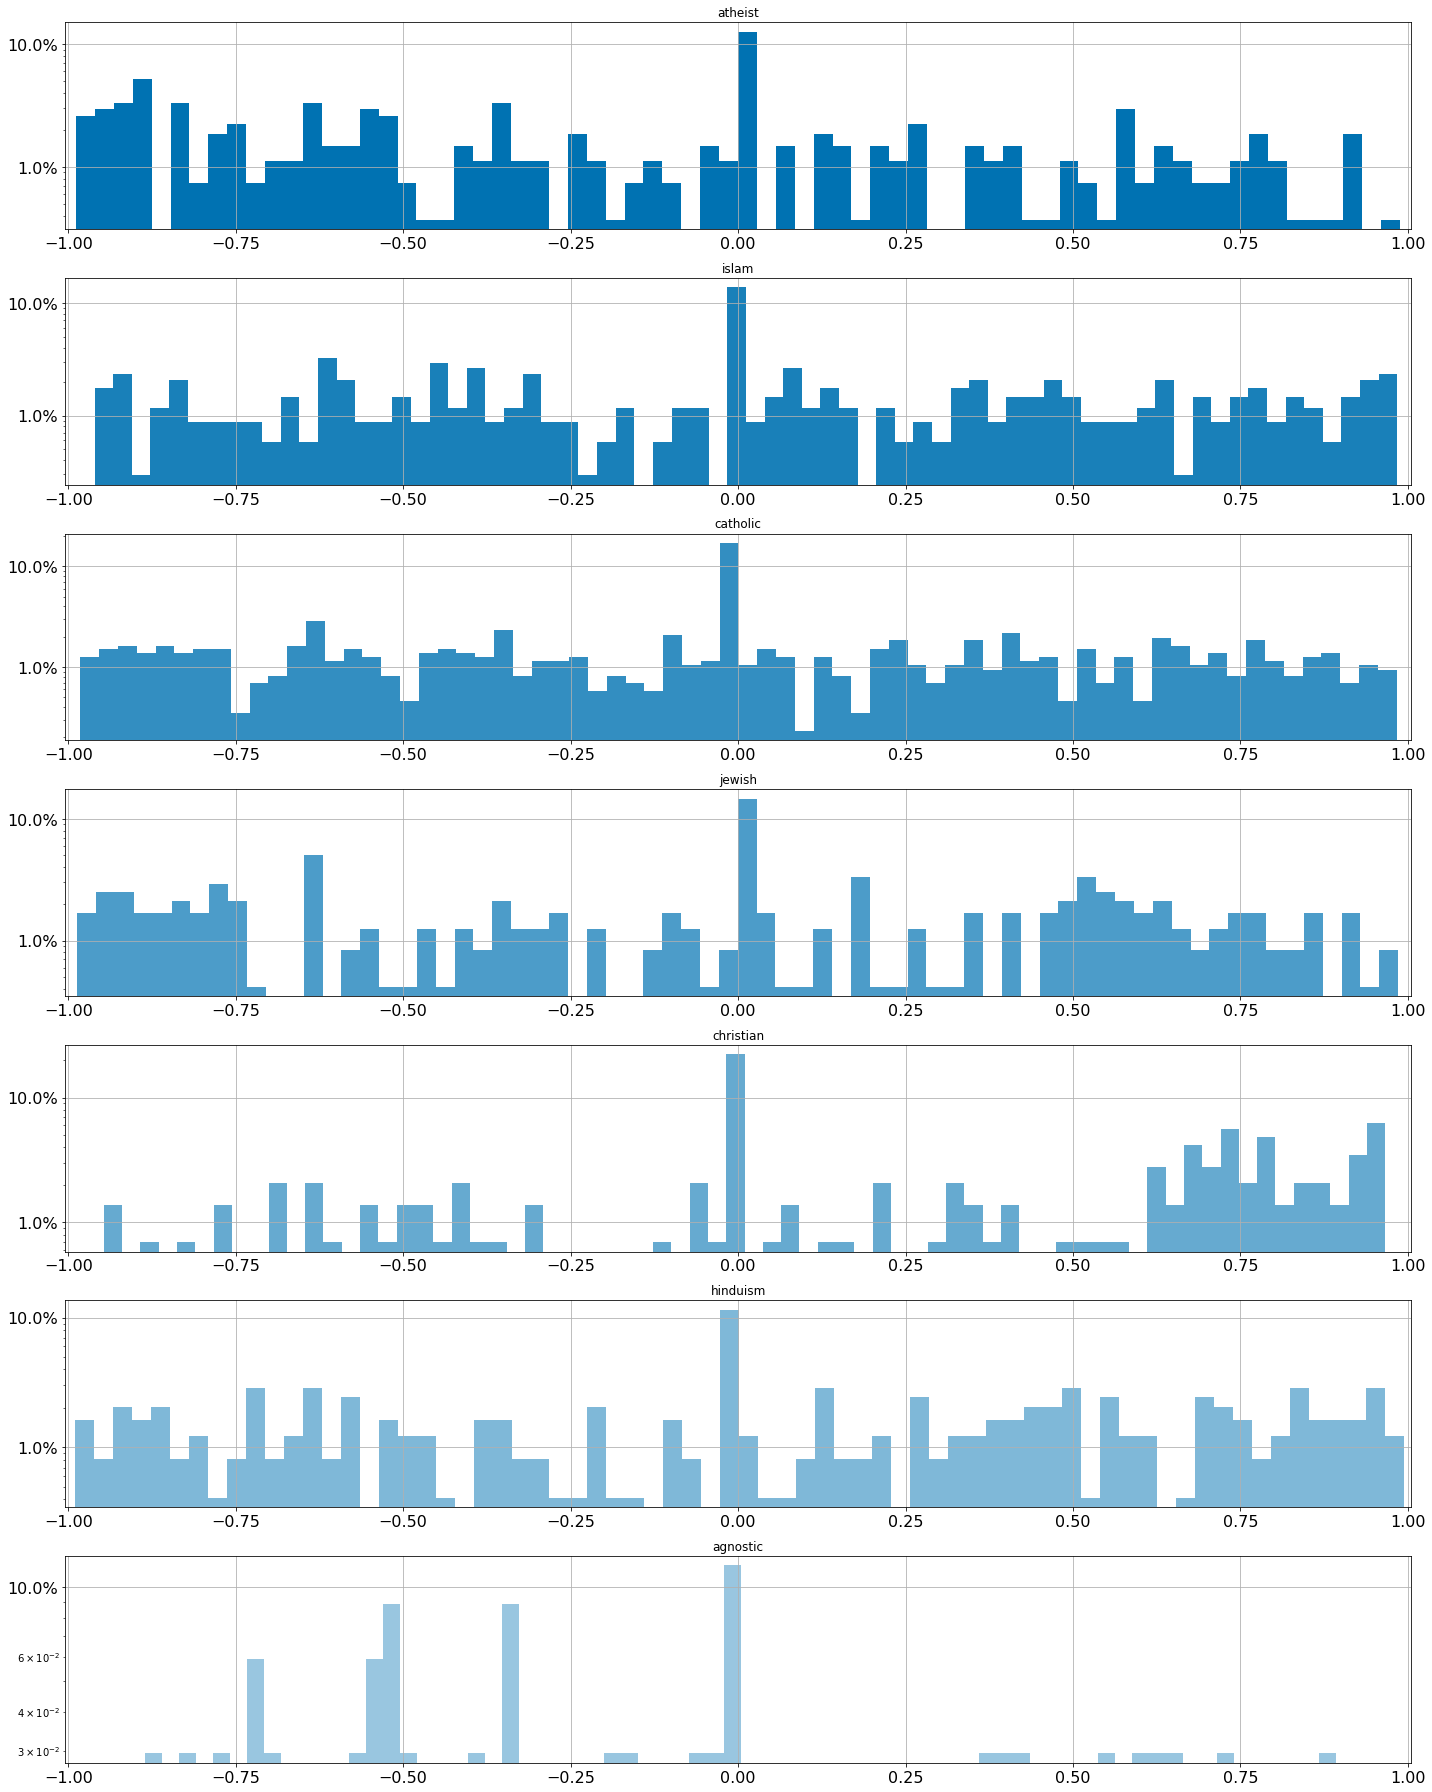

In [240]:
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gi_at_rel['rel'].unique()[i]
    weight = np.ones(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0])/gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gi_at_rel[gi_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    


'agnostic'

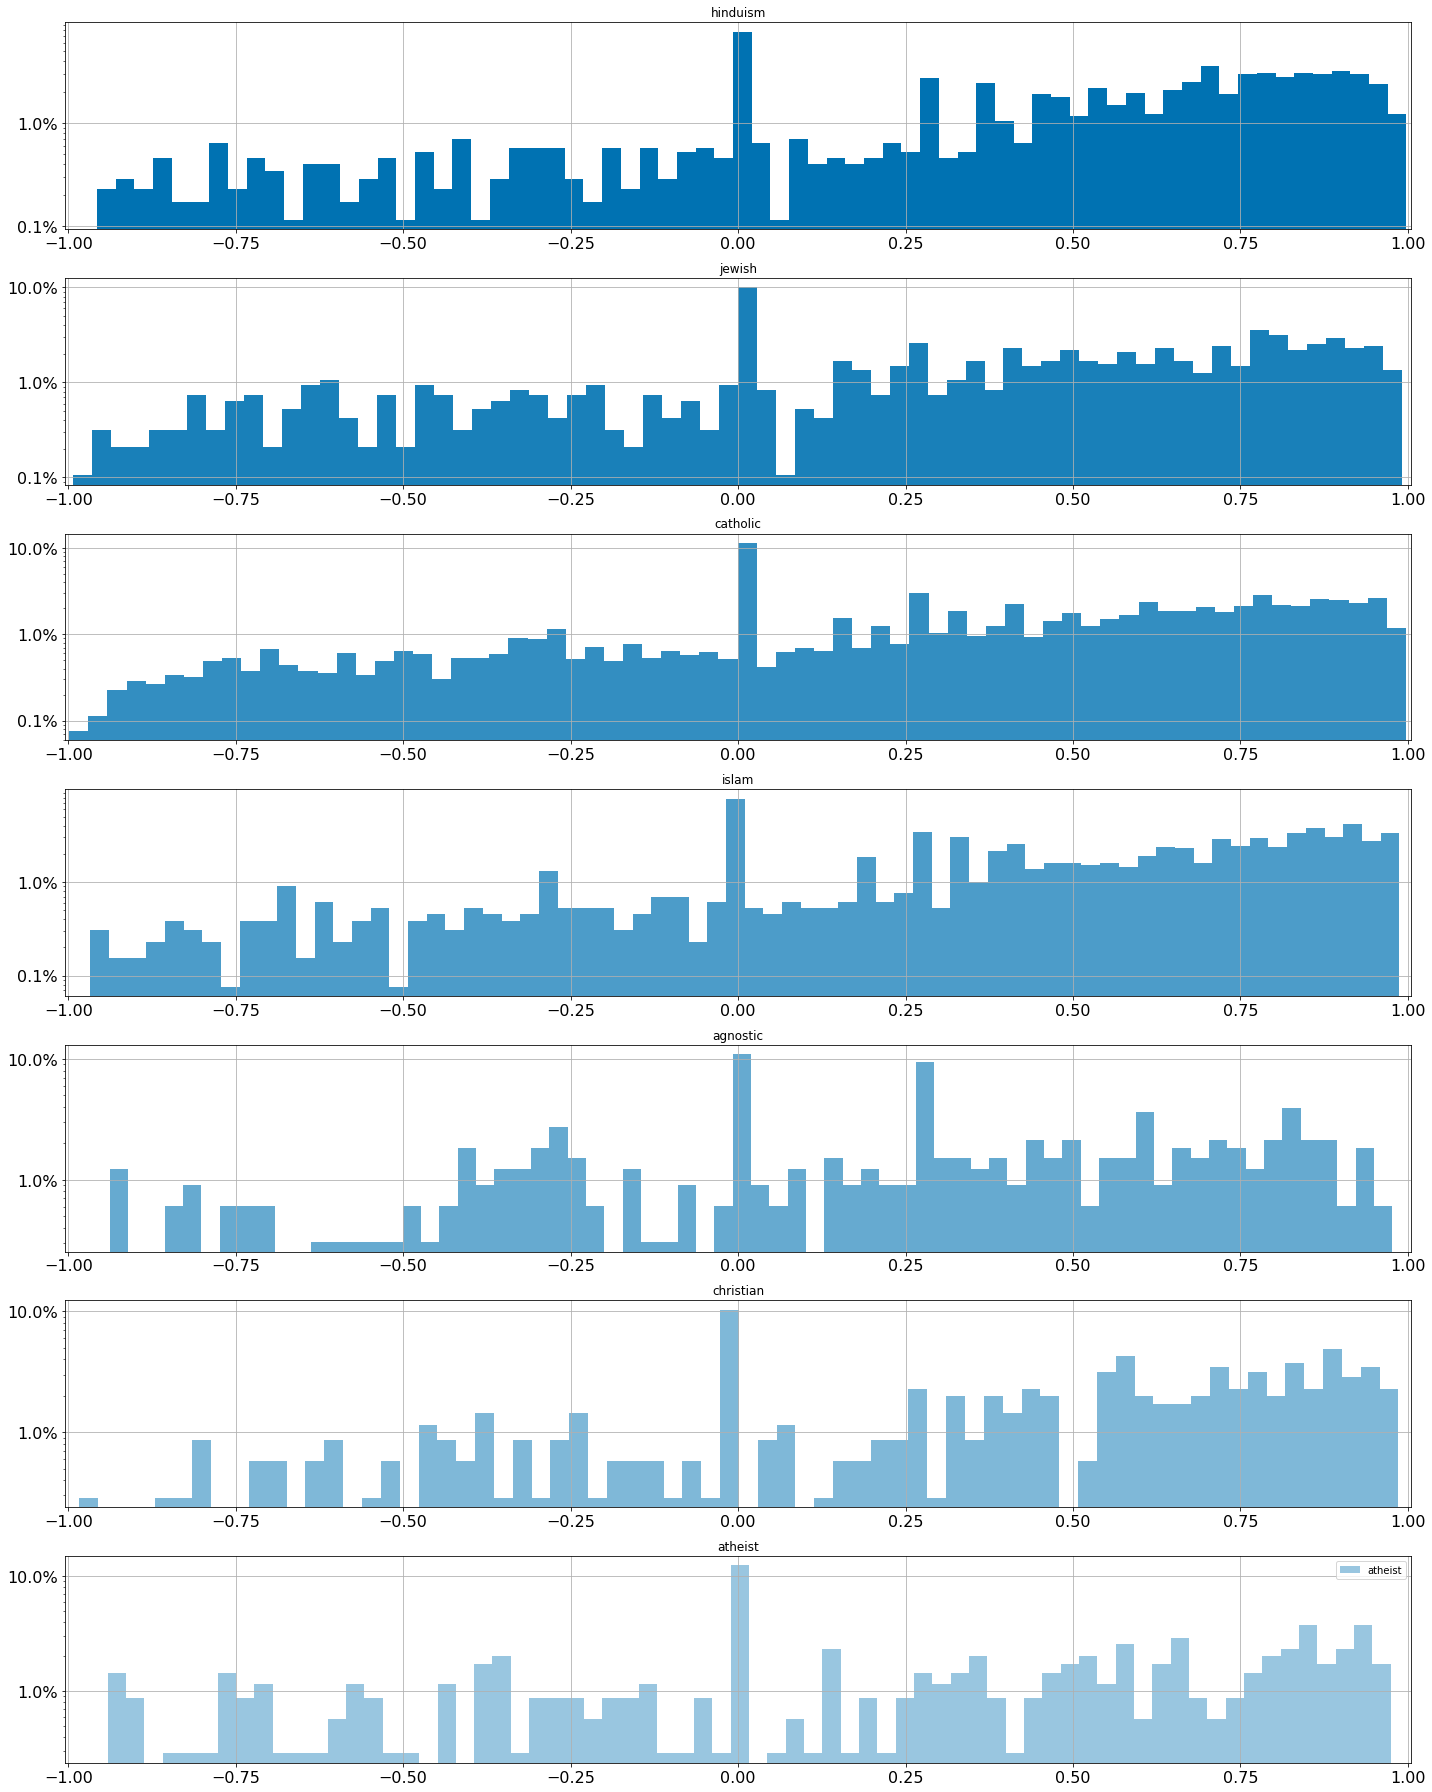

In [241]:
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gw_at_rel['rel'].unique()[i]
    weight = np.ones(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0])/gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gw_at_rel[gw_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

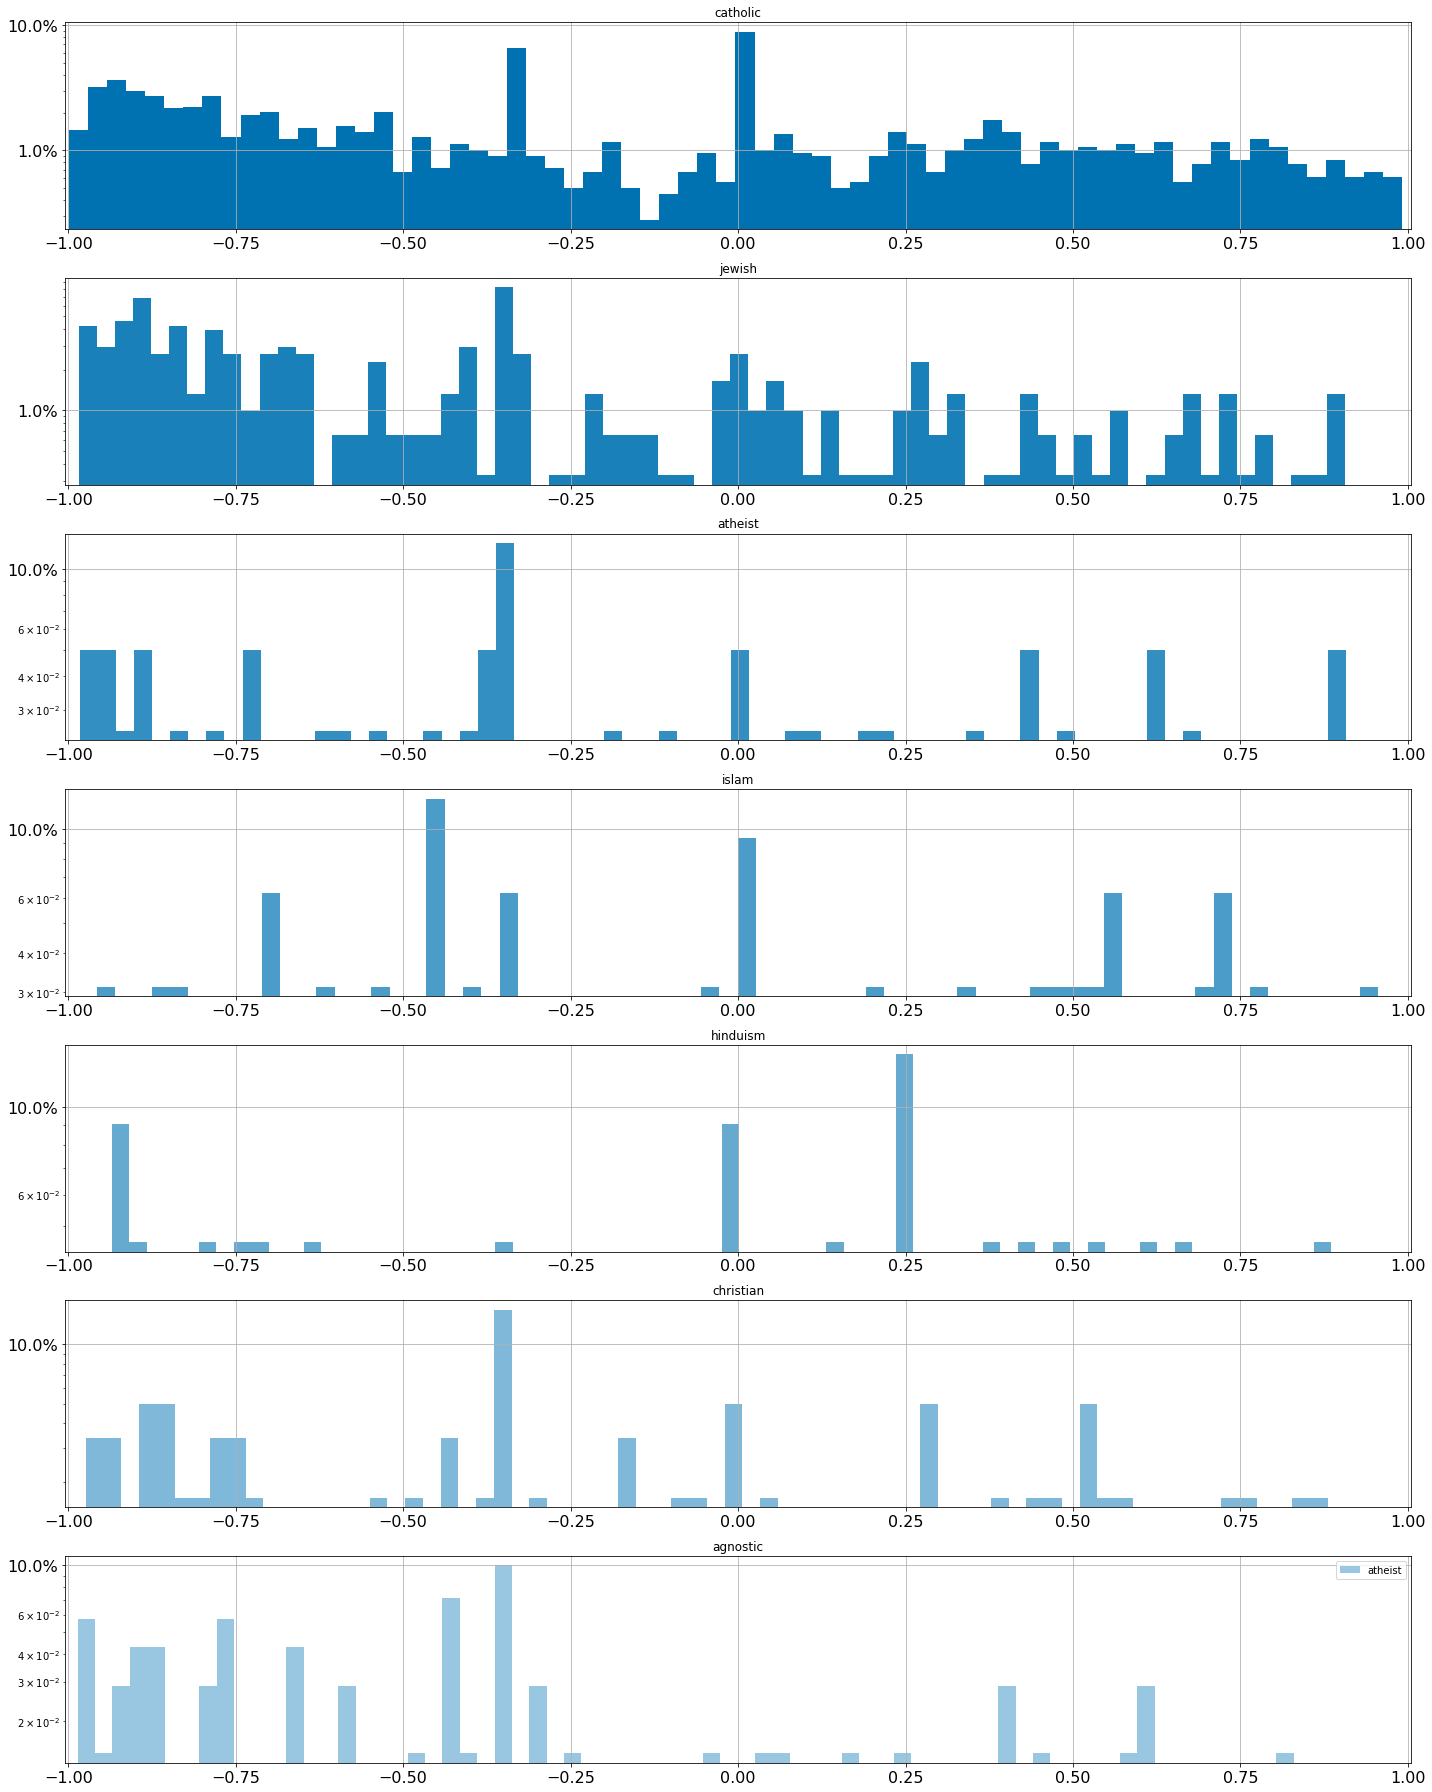

In [242]:
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = gc_at_rel['rel'].unique()[i]
    weight = np.ones(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0])/gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(gc_at_rel[gc_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

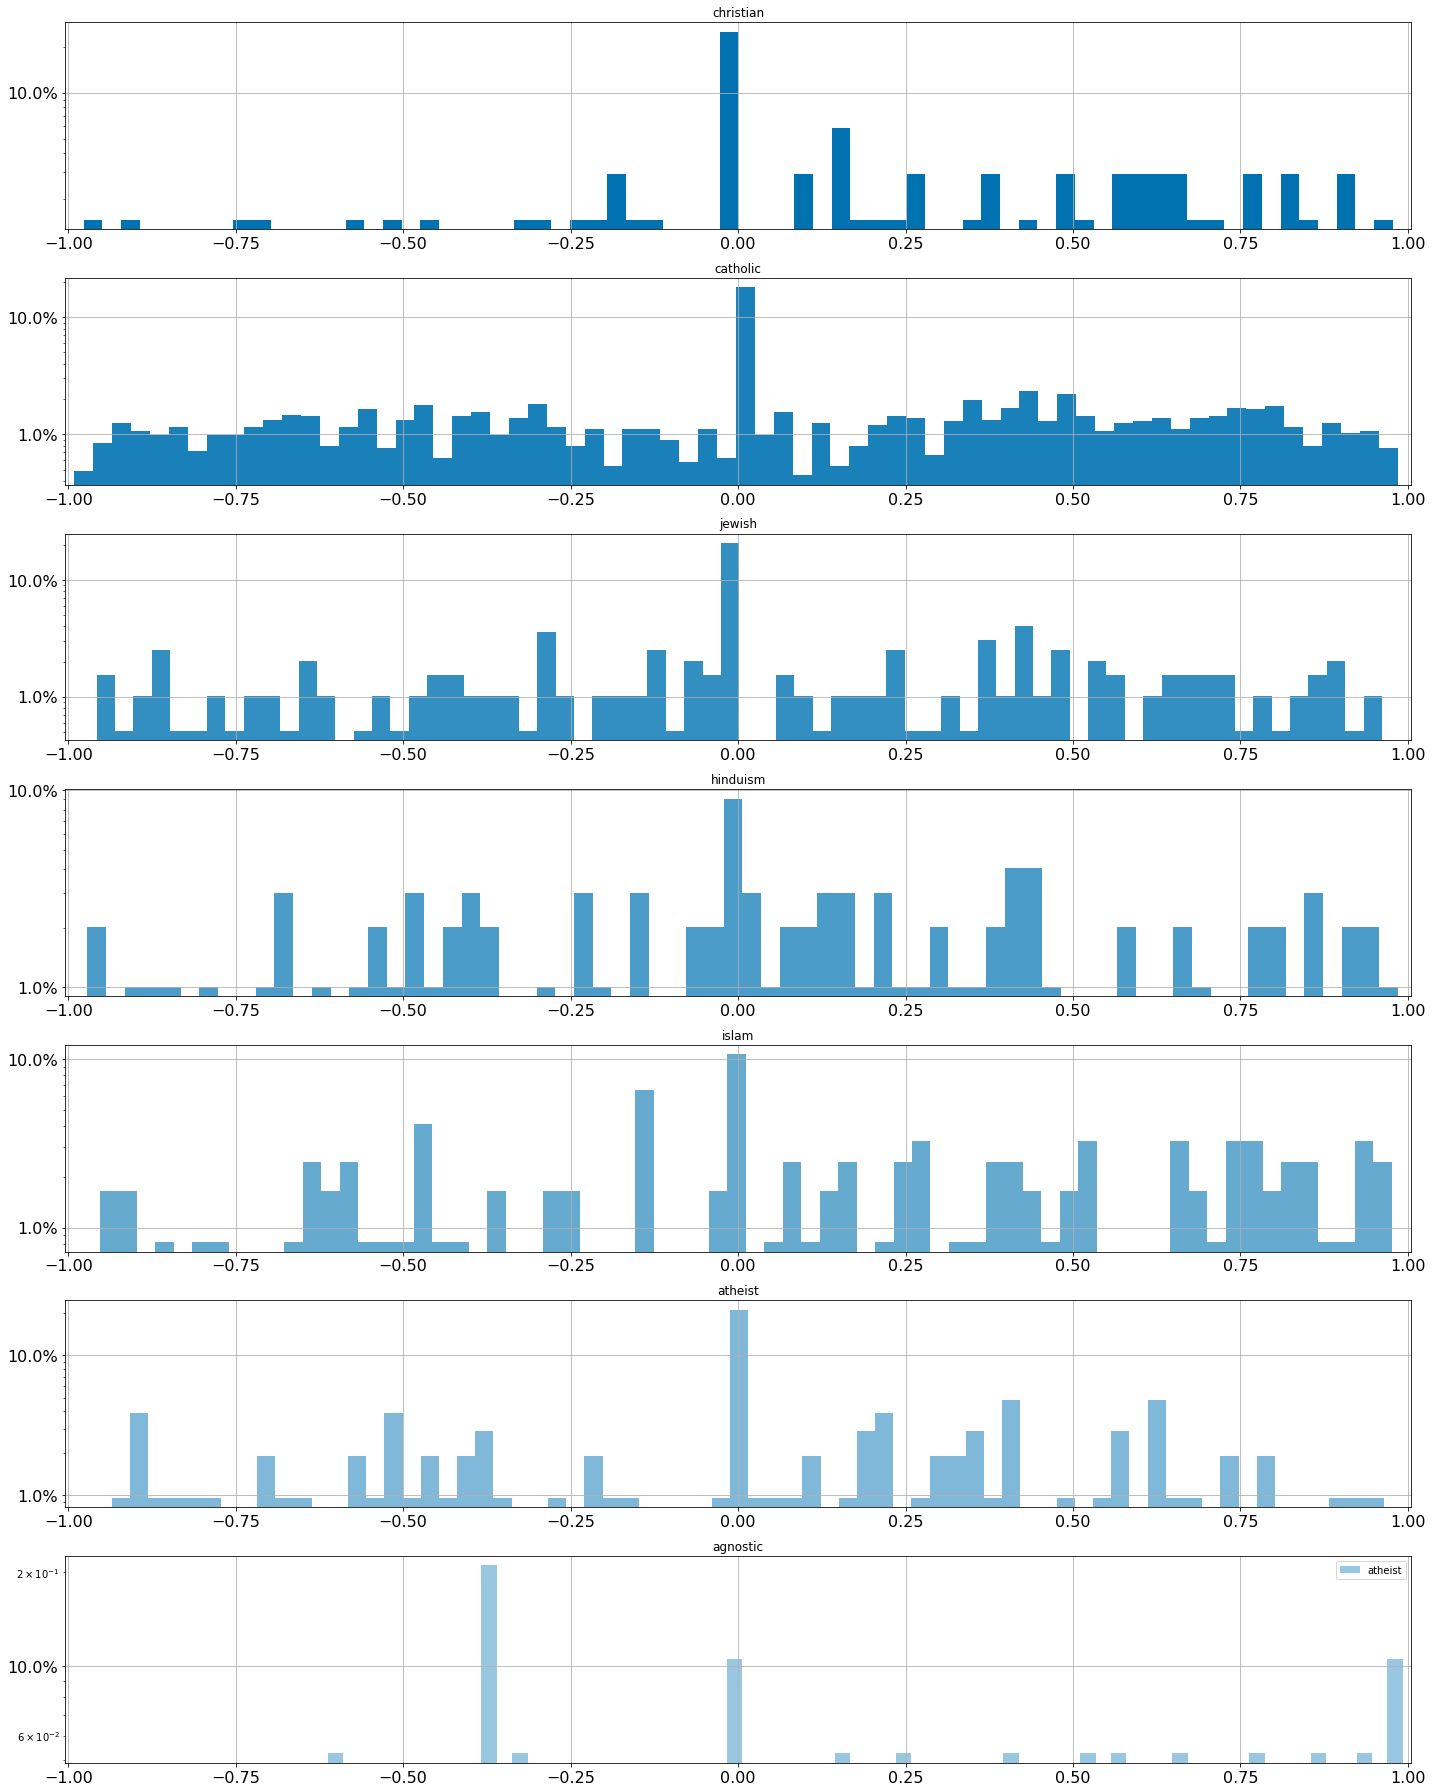

In [243]:
fig, axs = plt.subplots(7,figsize=(20,25))
alpha_score = 1

for i in range(0,7):
    religion = ab_at_rel['rel'].unique()[i]
    weight = np.ones(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0])/ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'].shape[0]
    axs[i].hist(ab_at_rel[ab_at_rel['rel'] == religion]['compound scores'], alpha =alpha_score, weights = weight, bins = 70)
    axs[i].title.set_text(religion)
    alpha_score -= 0.1

    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    
    # set yaxis to percentage
    axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()
    
    
plt.legend(gi_at_rel['rel'].unique())

### Nationality

In [247]:
gi_at_nat.head()
gi_at_nat['nation'].unique()

array(['USA', 'Australia', None, 'Canada', 'UK', 'Ireland', 'Germany',
       'New Zeland', 'India'], dtype=object)

<ipython-input-251-faebf7db0ecb>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])
<ipython-input-251-faebf7db0ecb>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i].set_yscale('log')


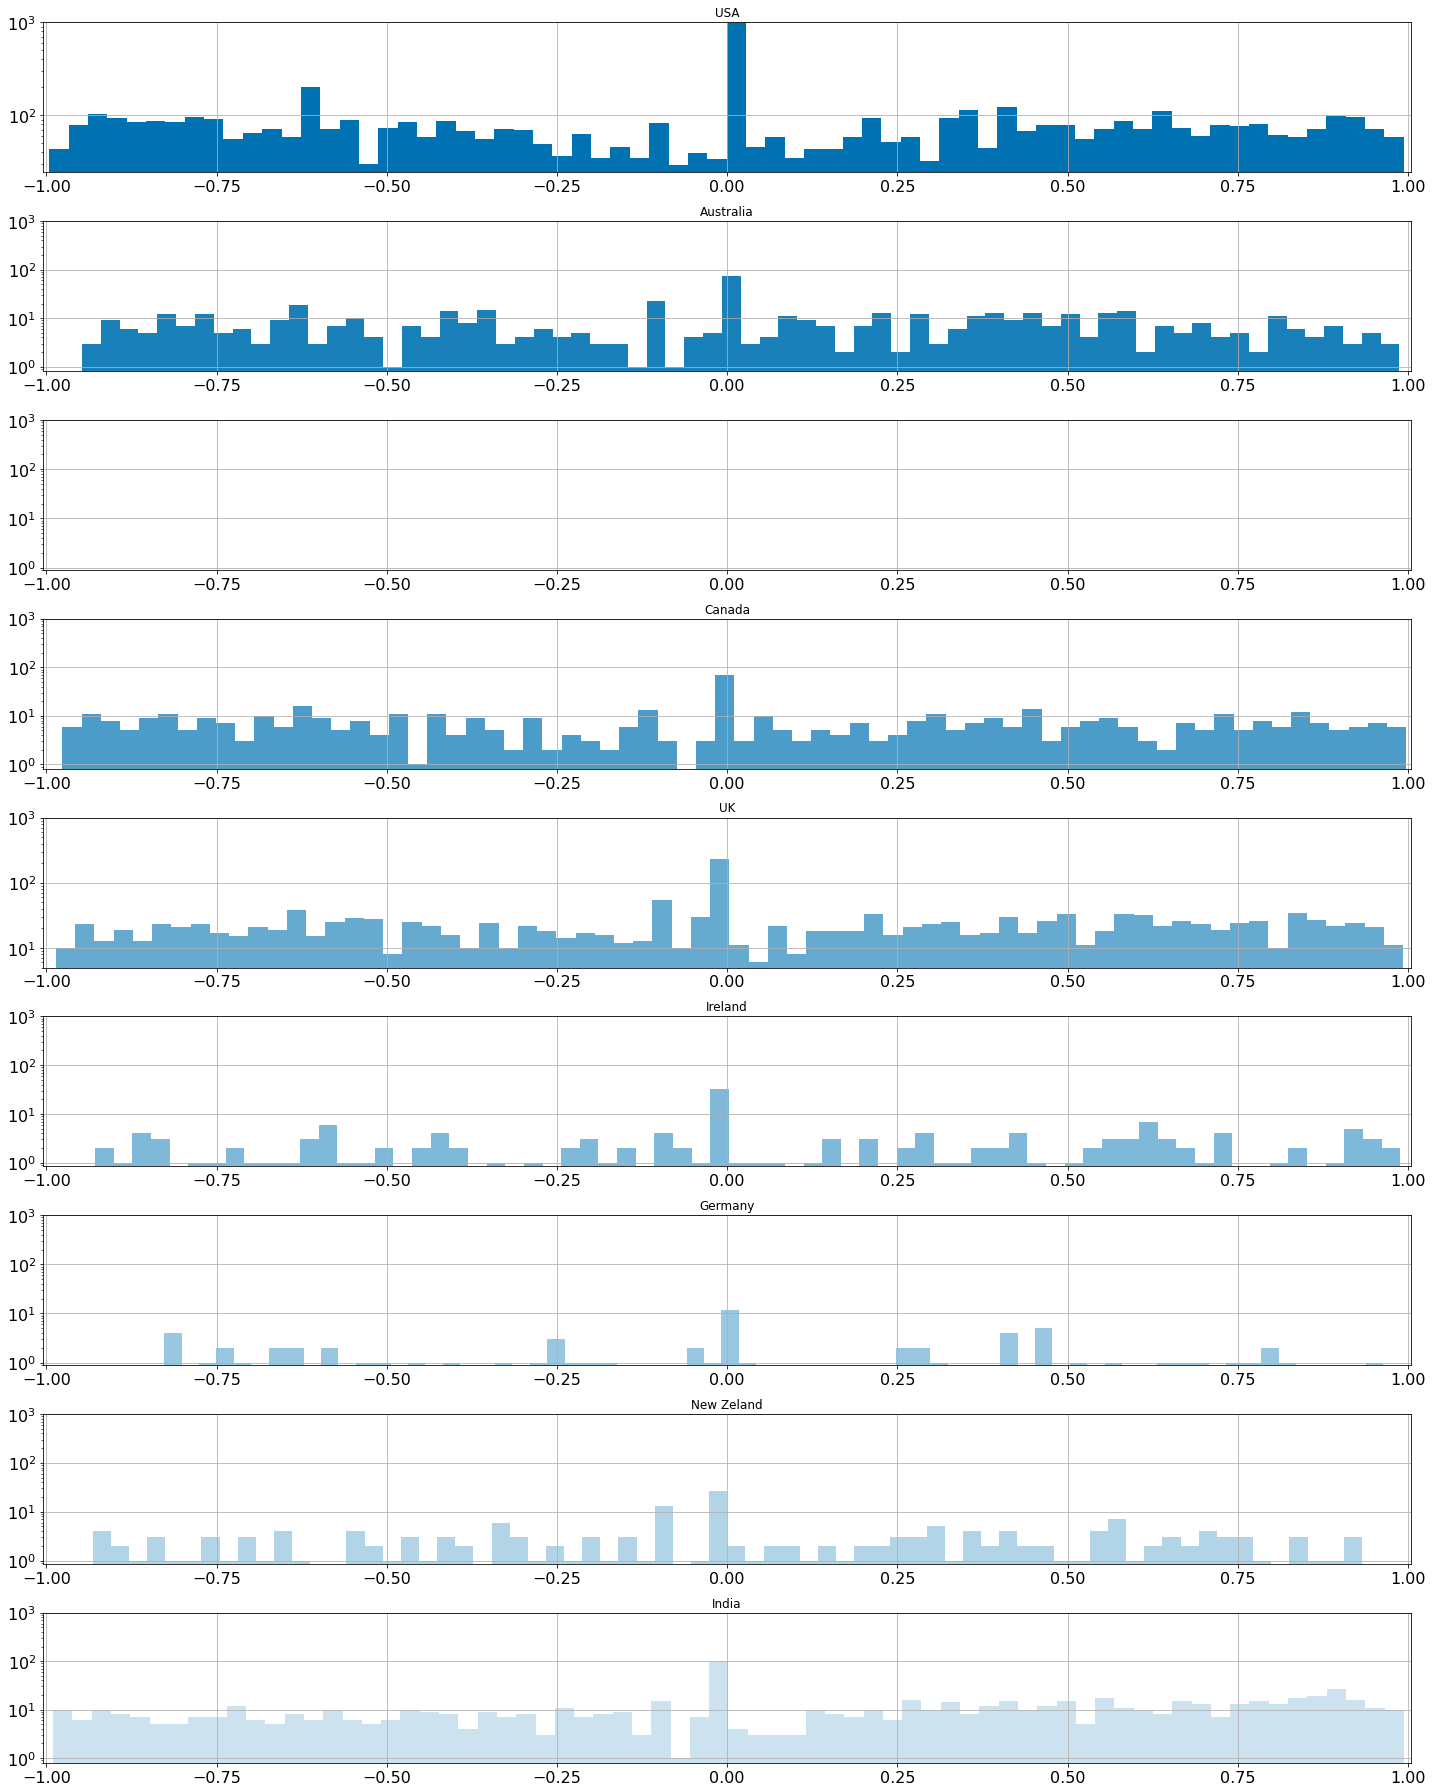

In [251]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gi_at_nat['nation'].unique()[i]
    weight = np.ones(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0])/gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gi_at_nat[gi_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

<ipython-input-254-b470b316cbb6>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**4])
<ipython-input-254-b470b316cbb6>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i].set_yscale('log')


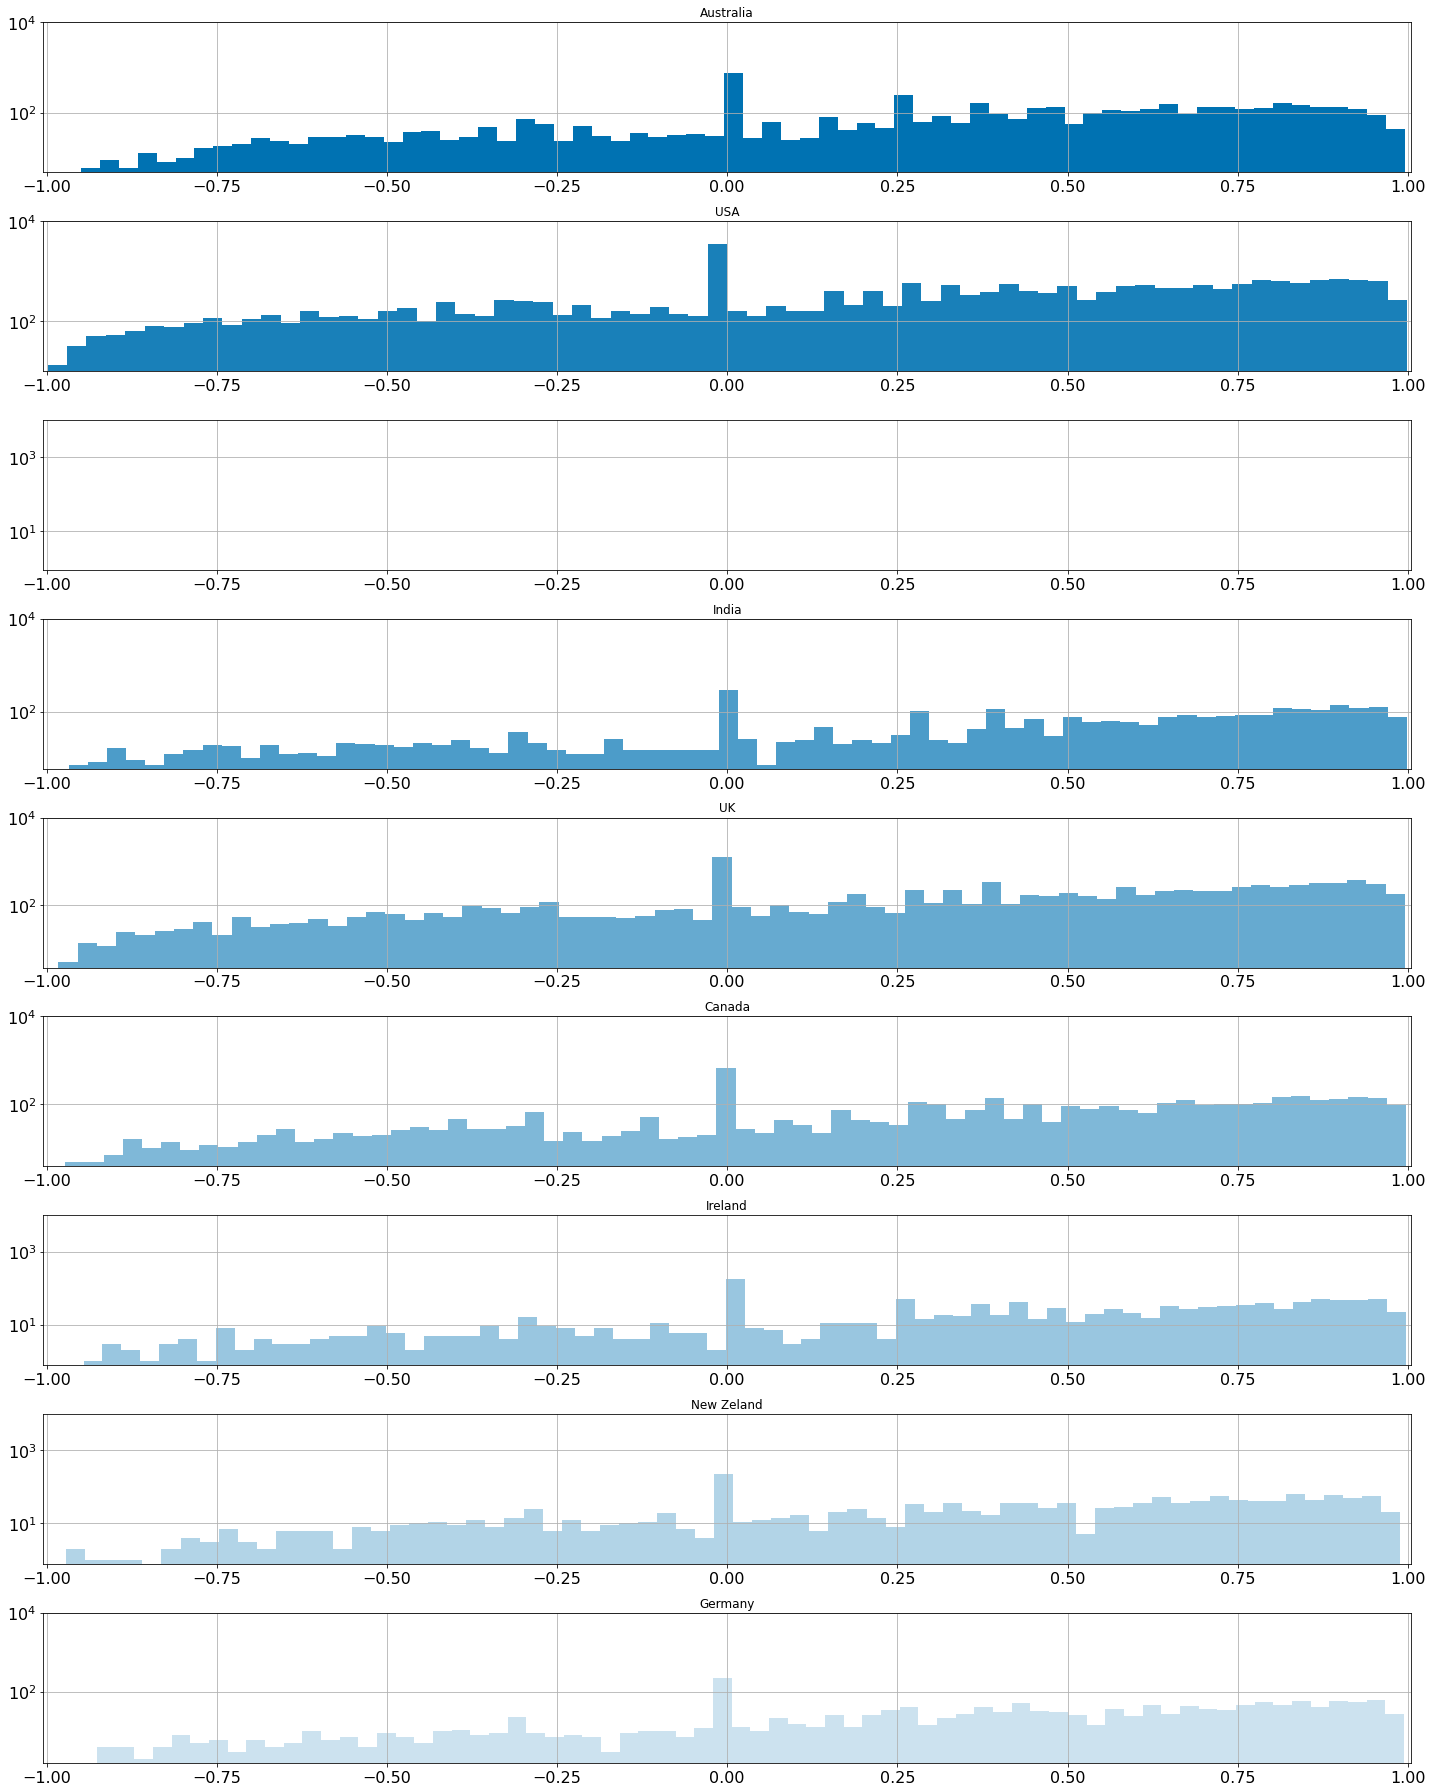

In [254]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gw_at_nat['nation'].unique()[i]
    weight = np.ones(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0])/gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gw_at_nat[gw_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**4])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

<ipython-input-255-2289af6827ec>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[i].set_ylim([0, 10**3])
<ipython-input-255-2289af6827ec>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i].set_yscale('log')


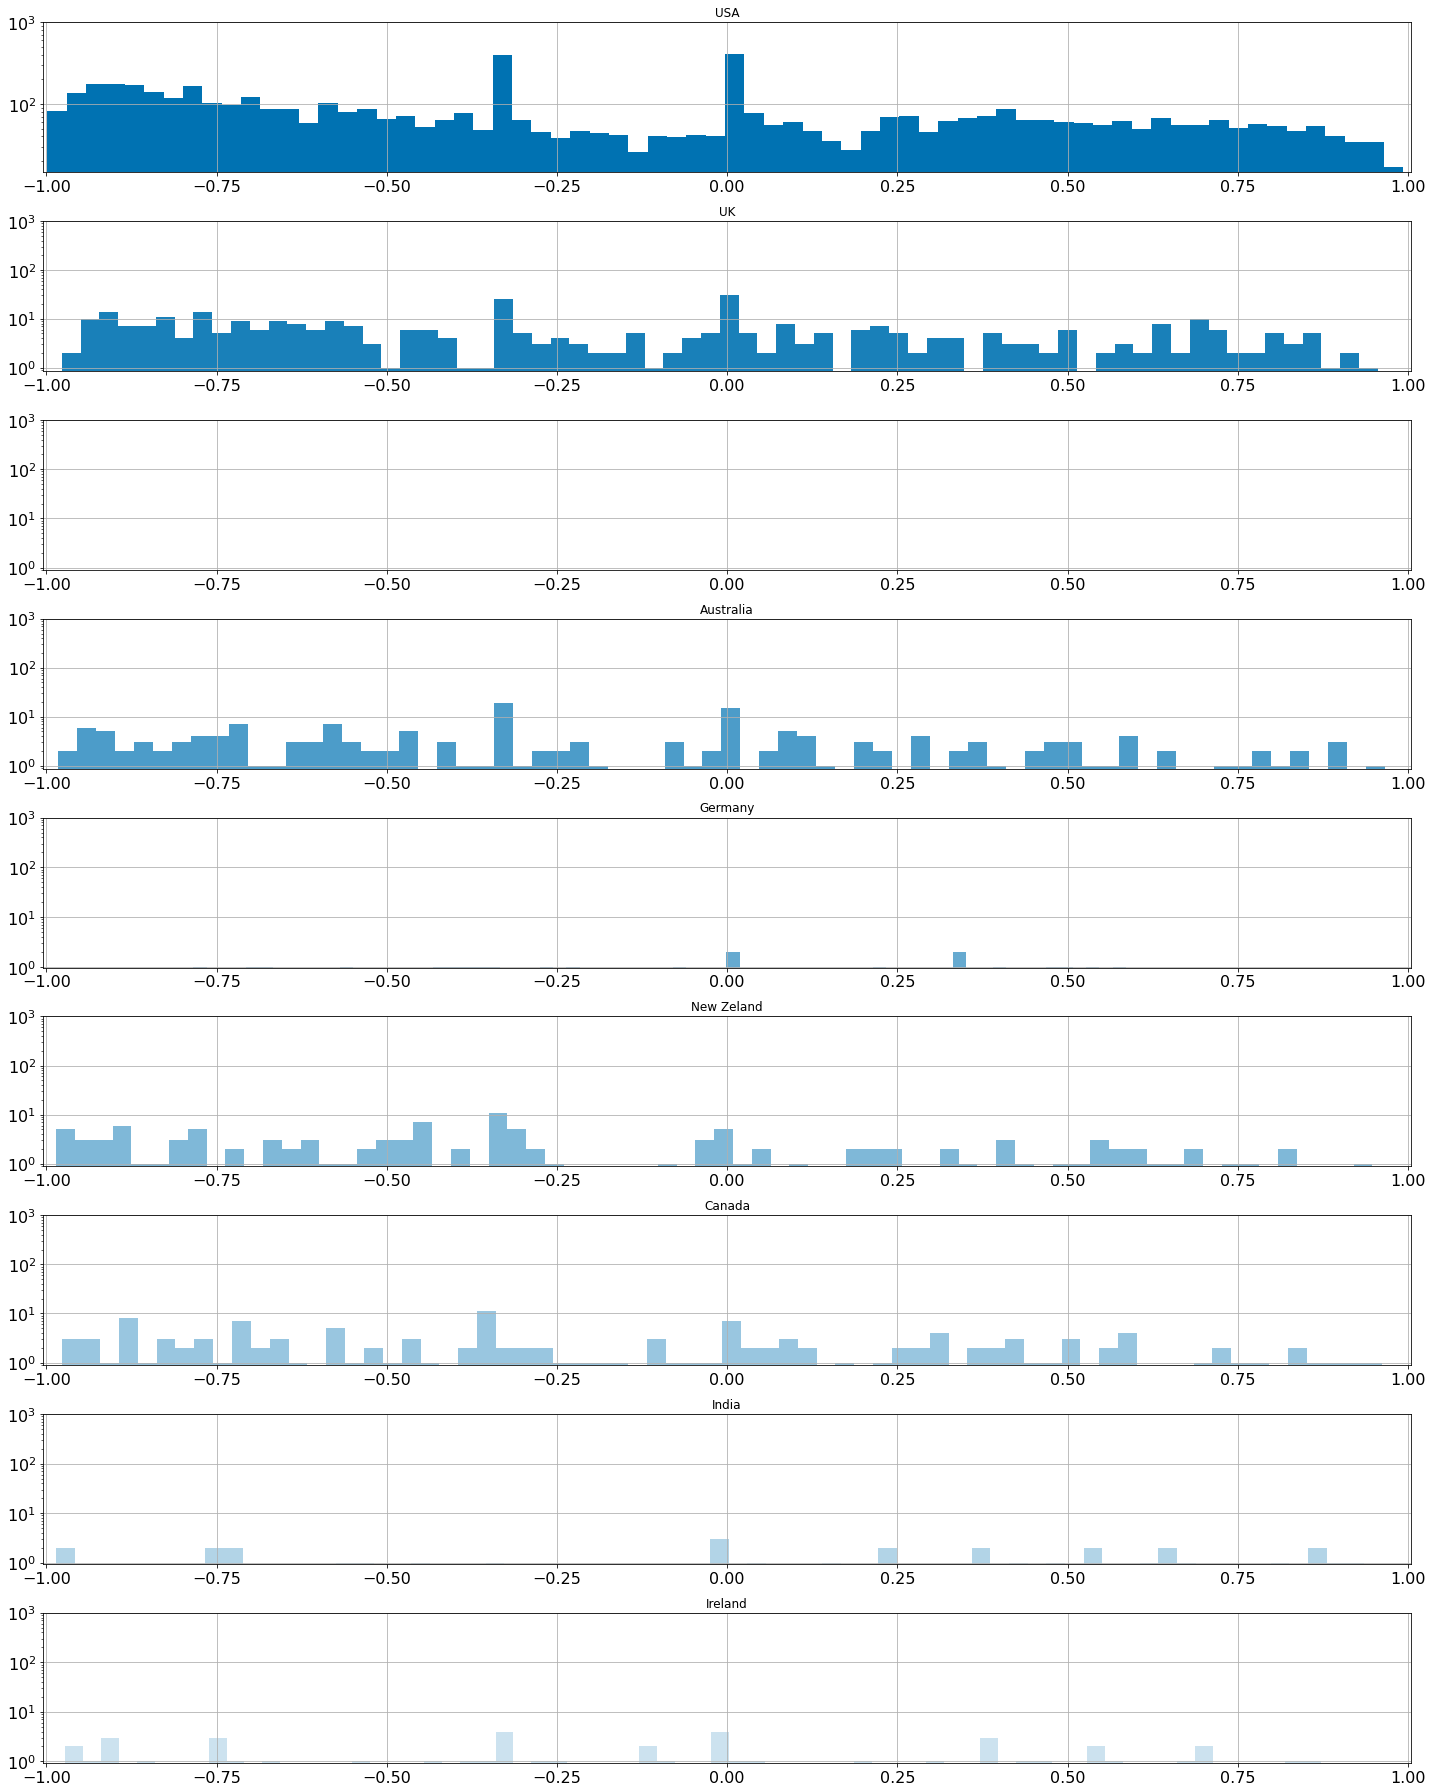

In [255]:
fig, axs = plt.subplots(9,figsize=(20,25))
alpha_score = 1

for i in range(0,9):
    nation = gc_at_nat['nation'].unique()[i]
    weight = np.ones(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0])/gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(gc_at_nat[gc_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
    axs[i].set_ylim([0, 10**3])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

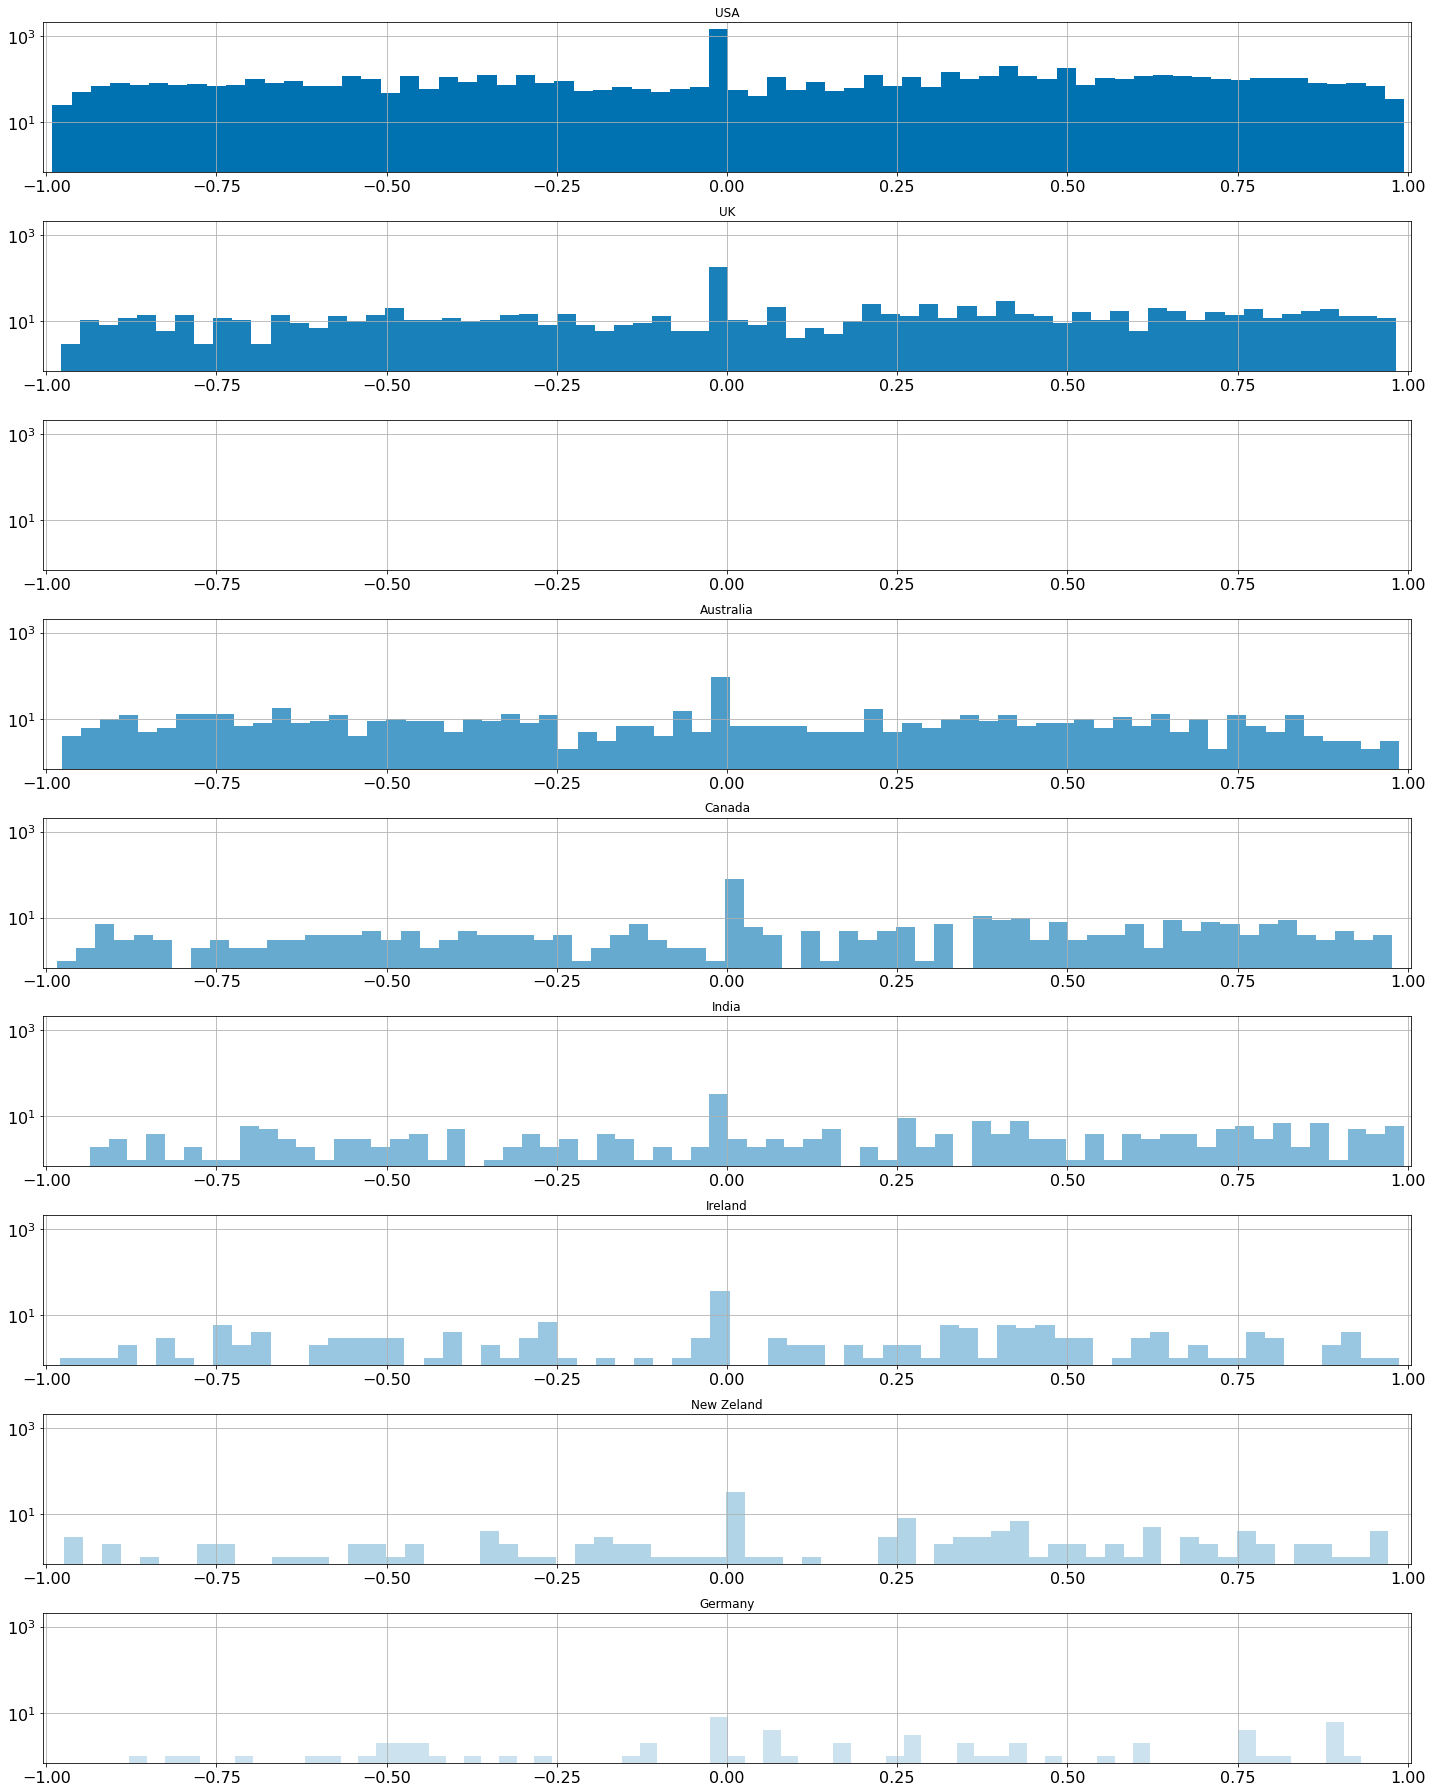

In [262]:
fig, axs = plt.subplots(9,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,9):
    nation = ab_at_nat['nation'].unique()[i]
    weight = np.ones(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0])/ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'].shape[0]
    axs[i].hist(ab_at_nat[ab_at_nat['nation'] == nation]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(nation)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])

    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

### Education

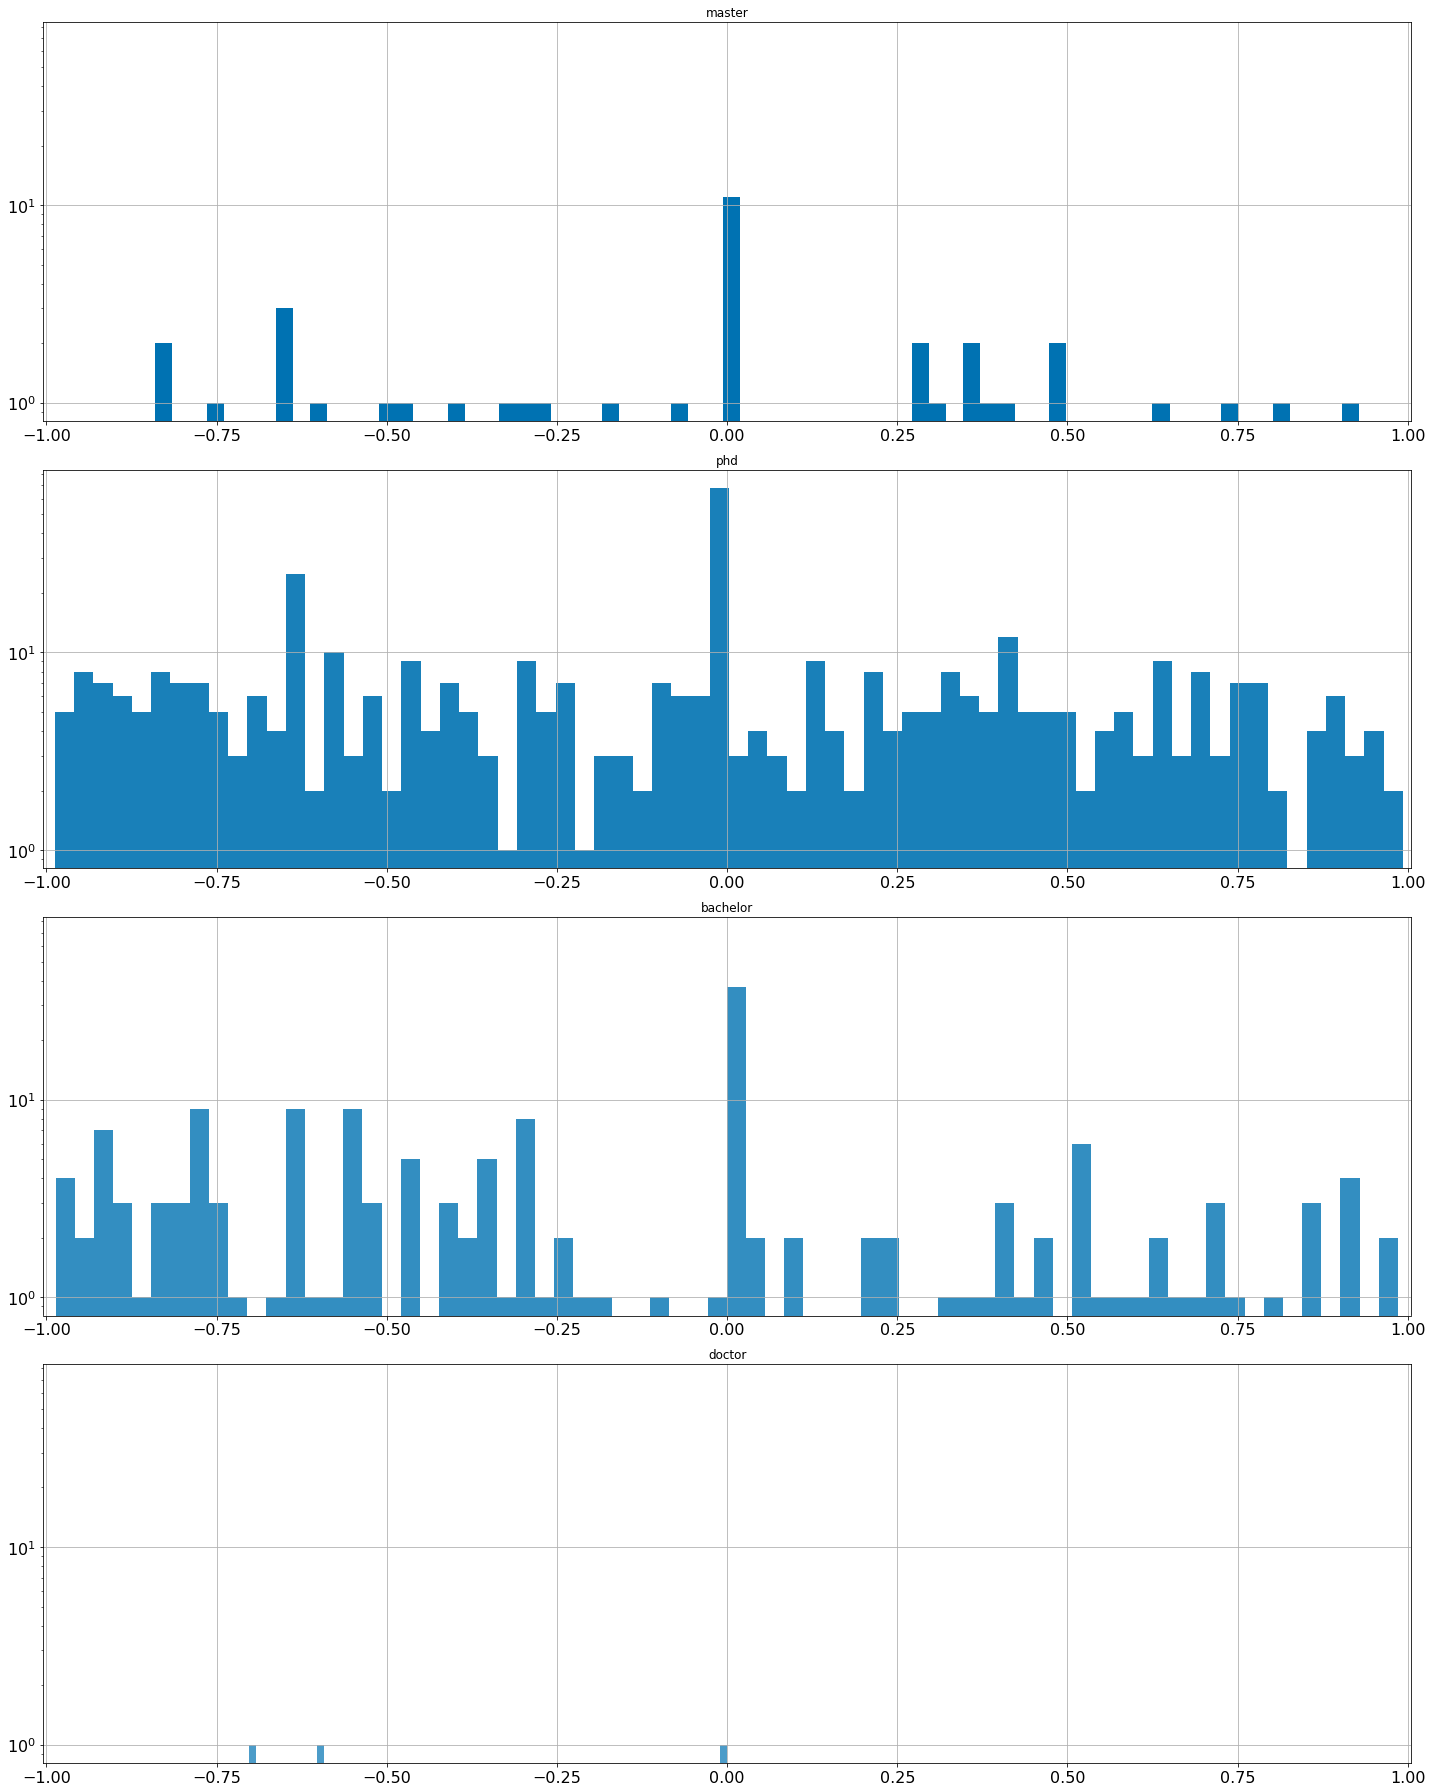

In [289]:

fig, axs = plt.subplots(4,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gi_at_deg['degree'].unique()[i]
    weight = np.ones(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0])/gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gi_at_deg[gi_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

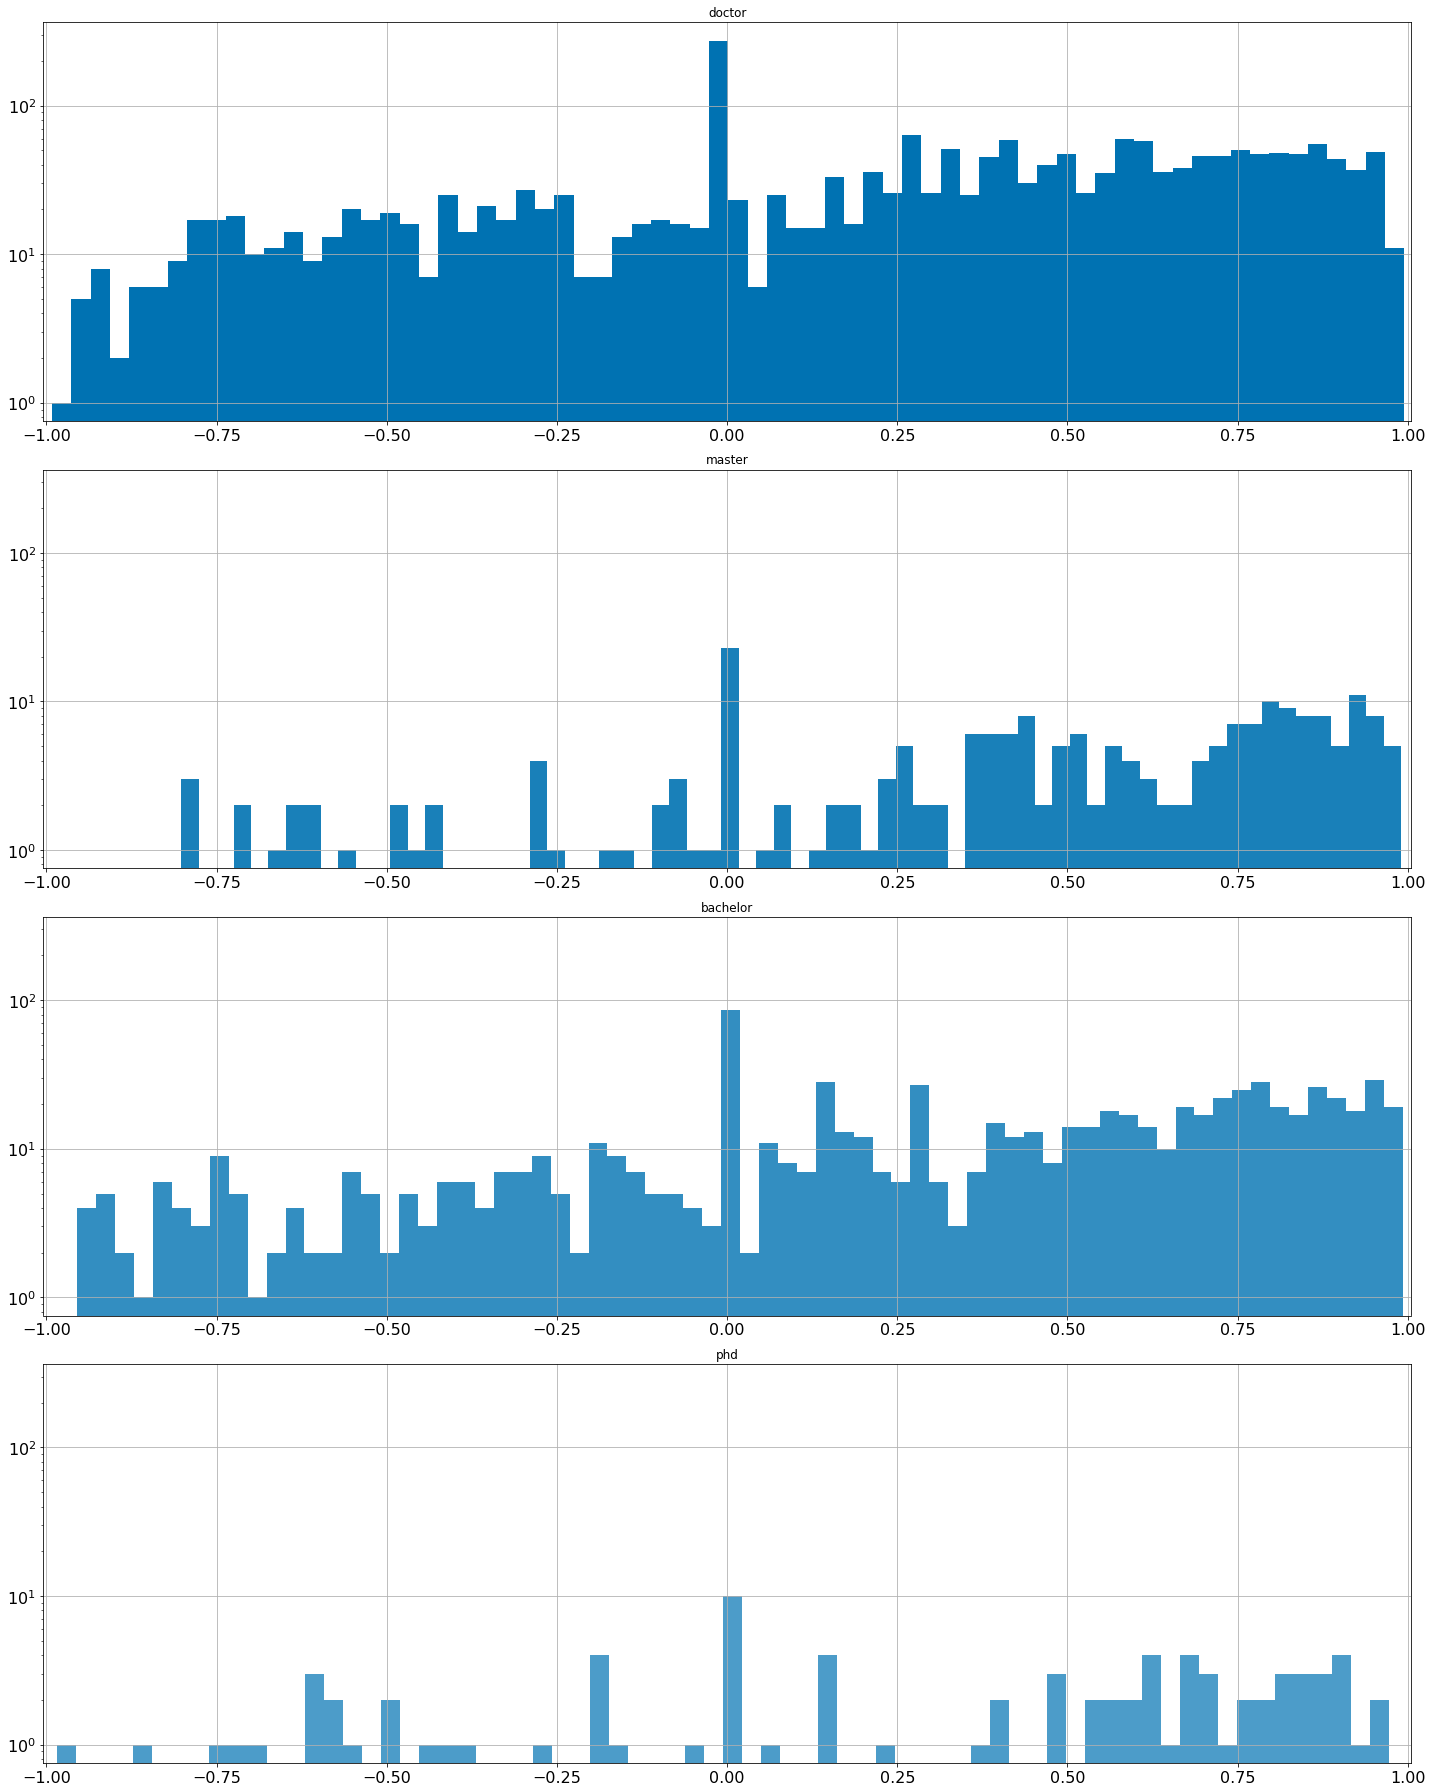

In [264]:

fig, axs = plt.subplots(4,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gw_at_deg['degree'].unique()[i]
    weight = np.ones(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0])/gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gw_at_deg[gw_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

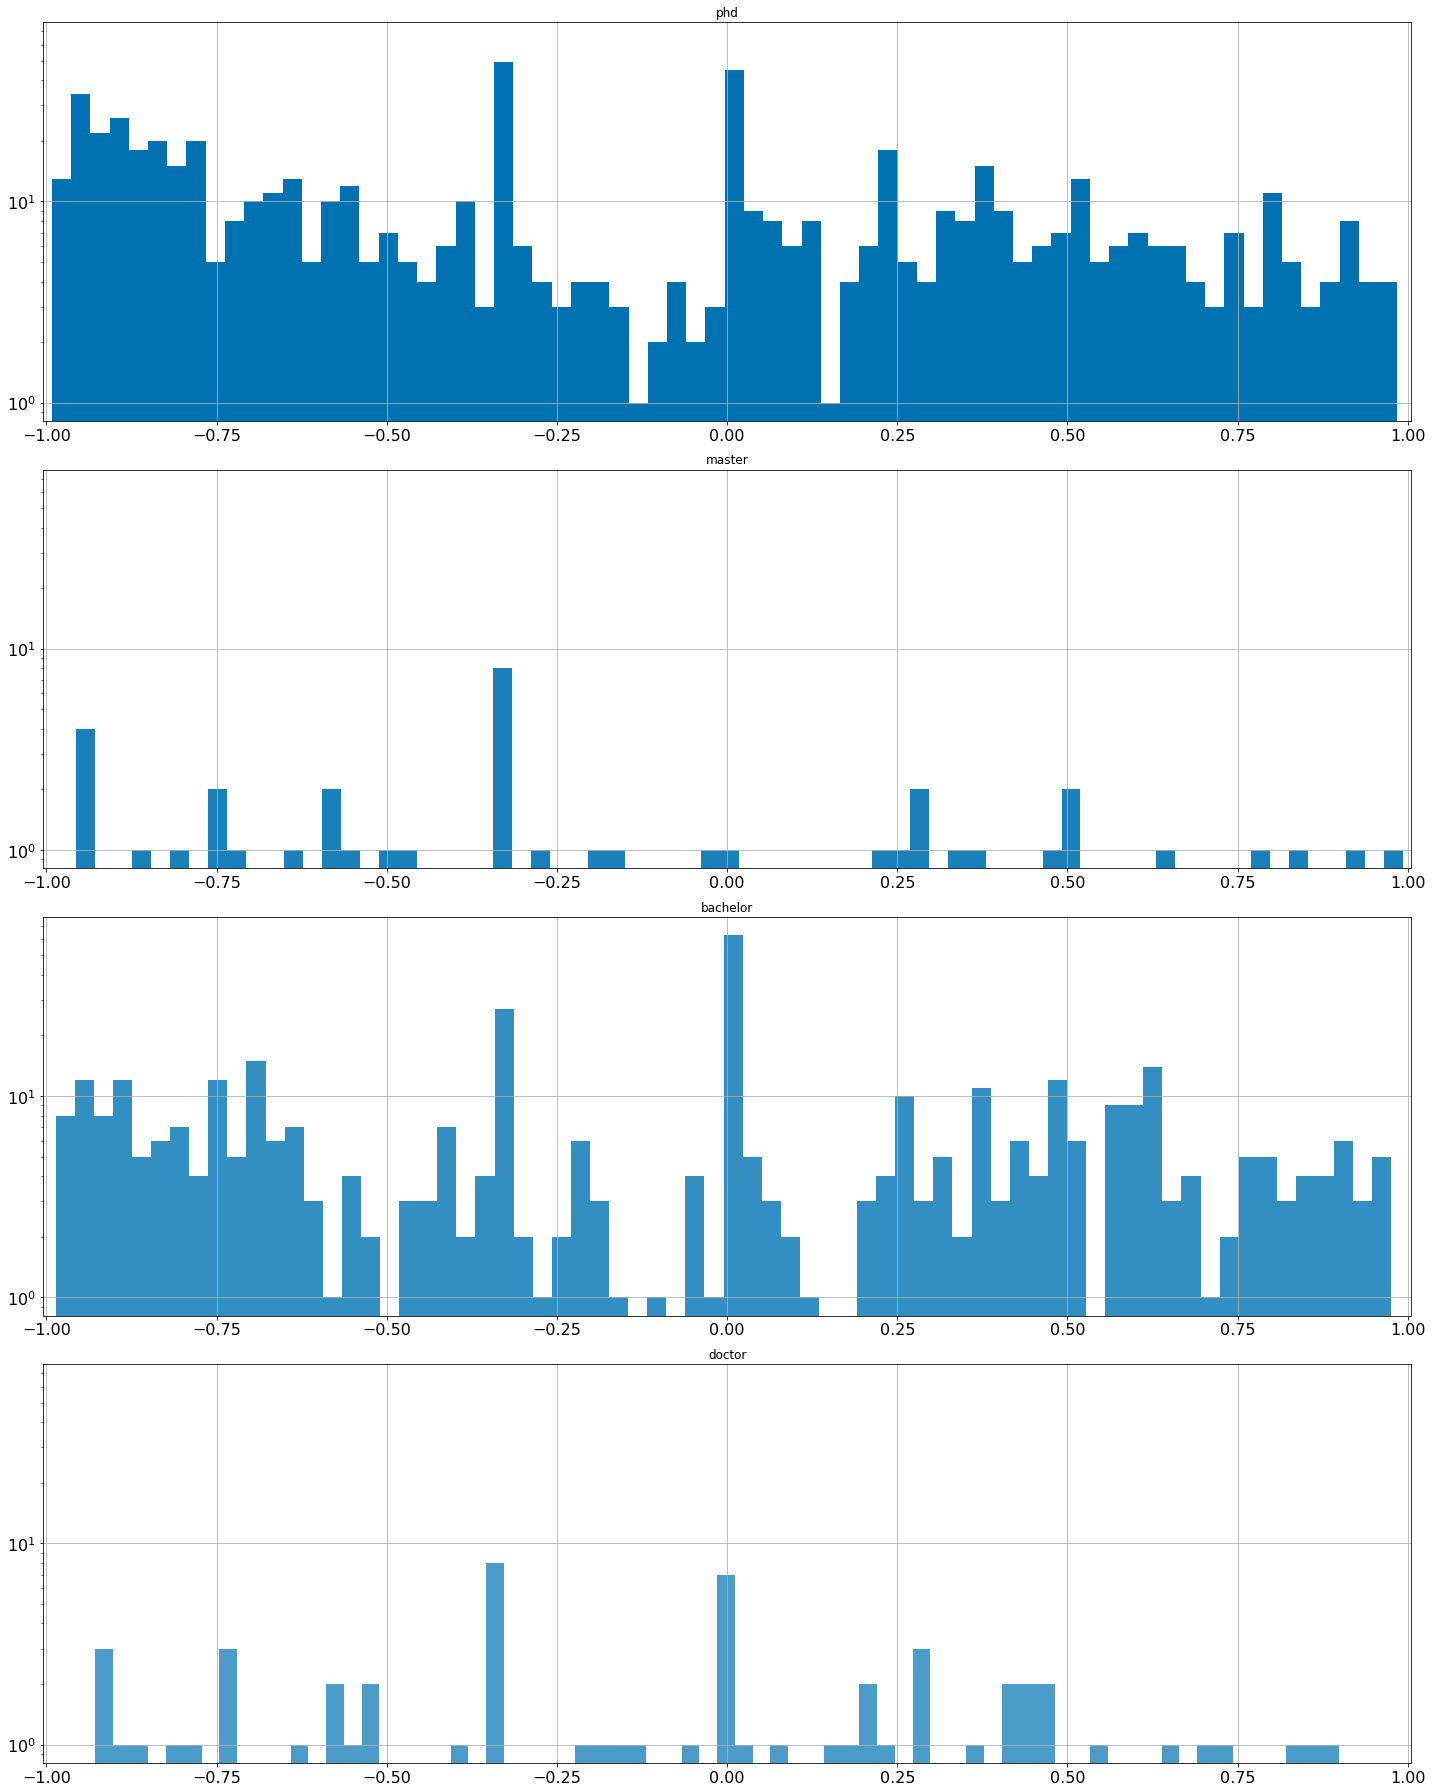

In [288]:

fig, axs = plt.subplots(4,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = gc_at_deg['degree'].unique()[i]
    weight = np.ones(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0])/gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(gc_at_deg[gc_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

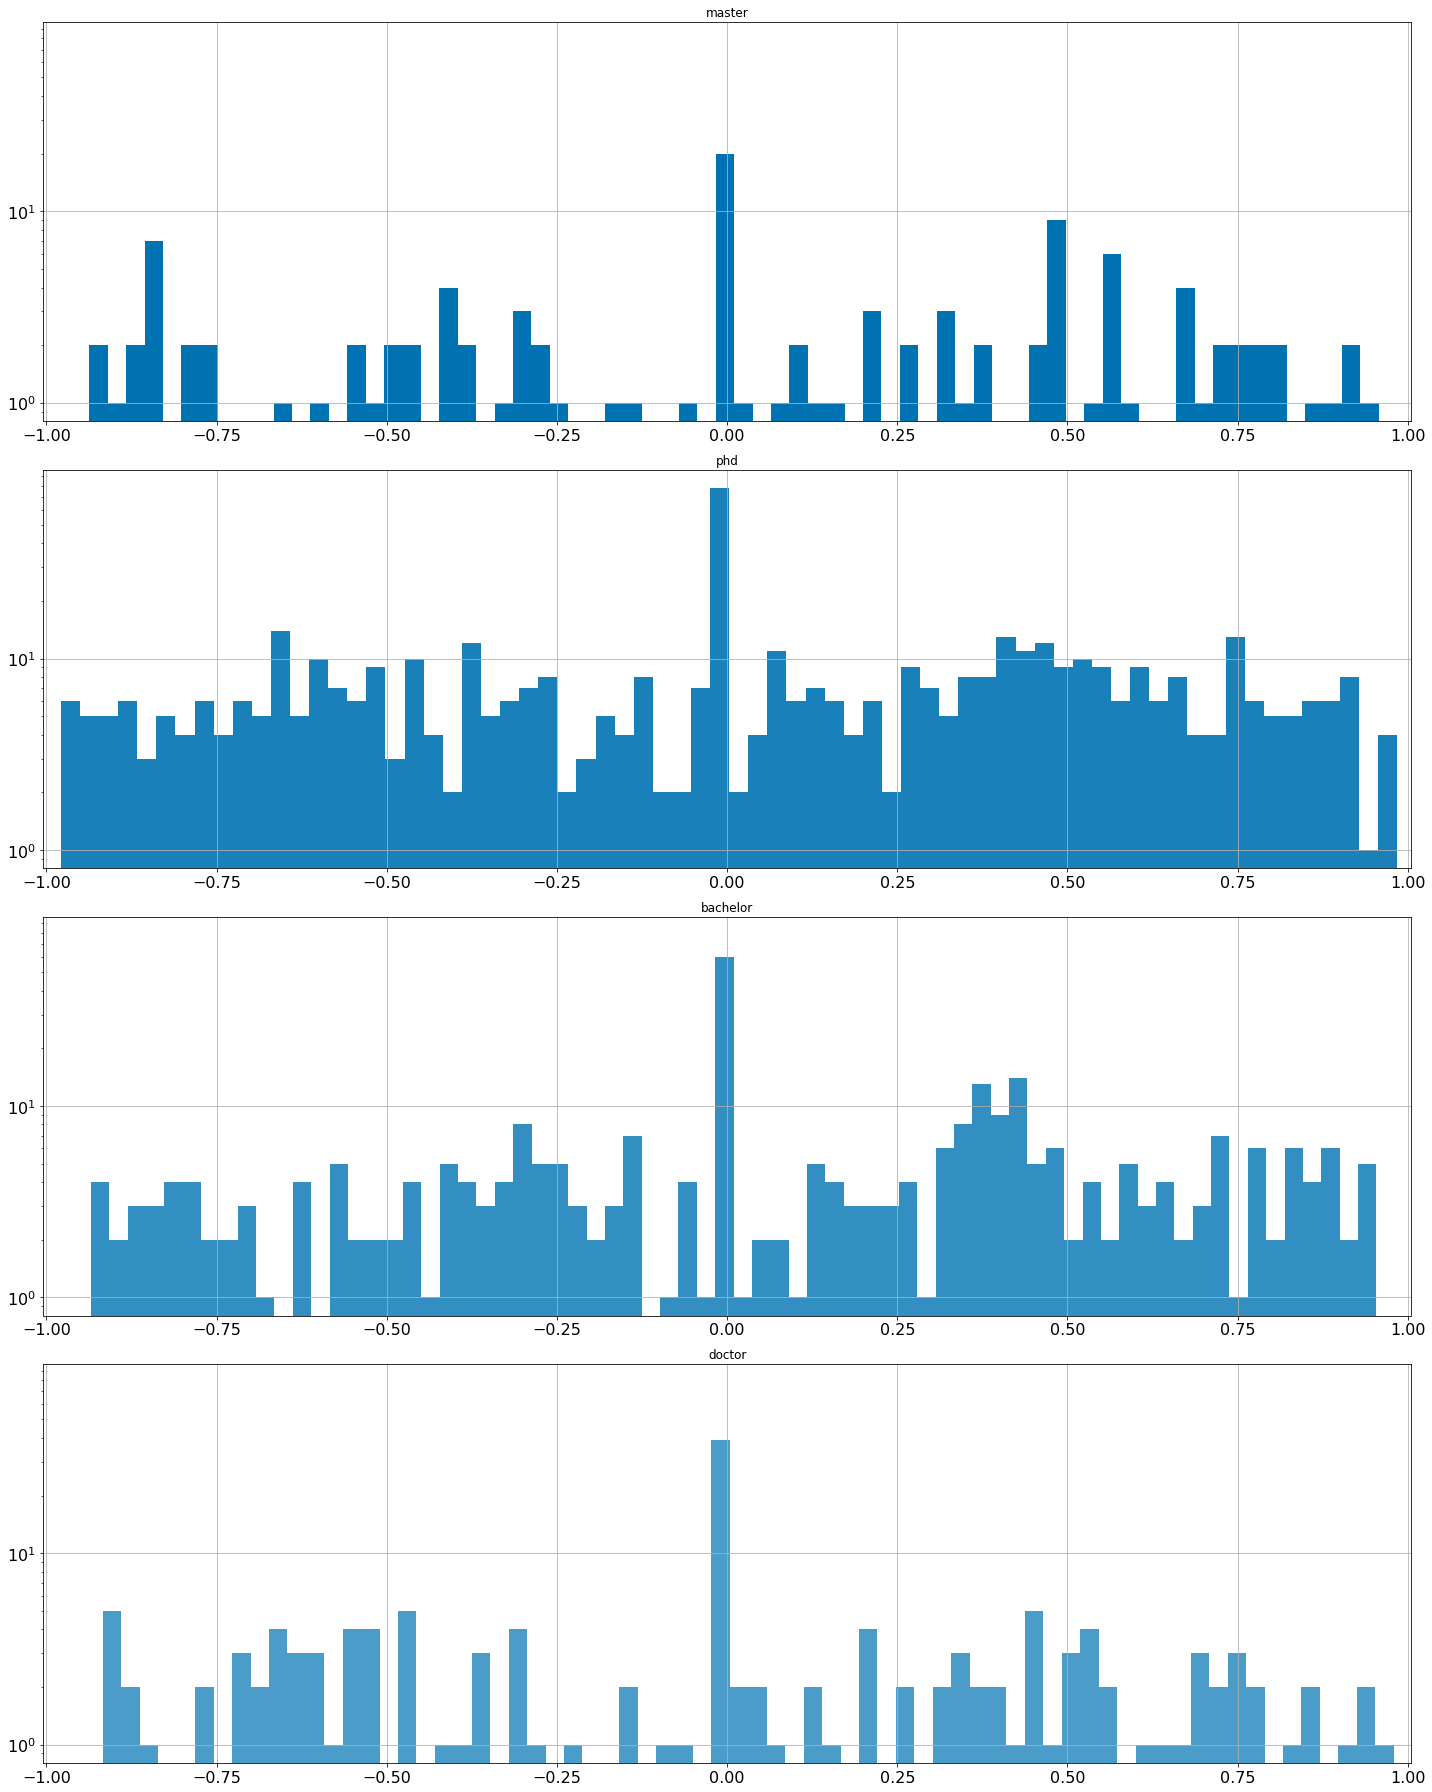

In [287]:

fig, axs = plt.subplots(4,figsize=(20,25), sharey = True)
alpha_score = 1

for i in range(0,4):
    degree = ab_at_deg['degree'].unique()[i]
    weight = np.ones(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0])/ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'].shape[0]
    axs[i].hist(ab_at_deg[ab_at_deg['degree'] == degree]['compound scores'], alpha =alpha_score,  bins = 70)
    axs[i].title.set_text(degree)
    alpha_score -= 0.1
    
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_xlim([-1.005,1.005])
   # axs[i].set_ylim([0, 10**])
    
    # set yaxis to percentage
   # axs[i].yaxis.set_major_formatter(PercentFormatter(1))

    axs[i].tick_params(axis='both', which='major', labelsize=16)
    
    # this makes the plot tight
    fig.tight_layout()

In [355]:
gw_at_deg.degree.str.split(',', expand=True).stack().value_counts().head(10)

phd         2441
bachelor     892
master       277
doctor       102
dtype: int64

Text(0.5, 1.02, 'Distribution of Compound Scores for Global Warming')

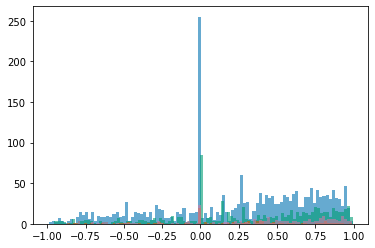

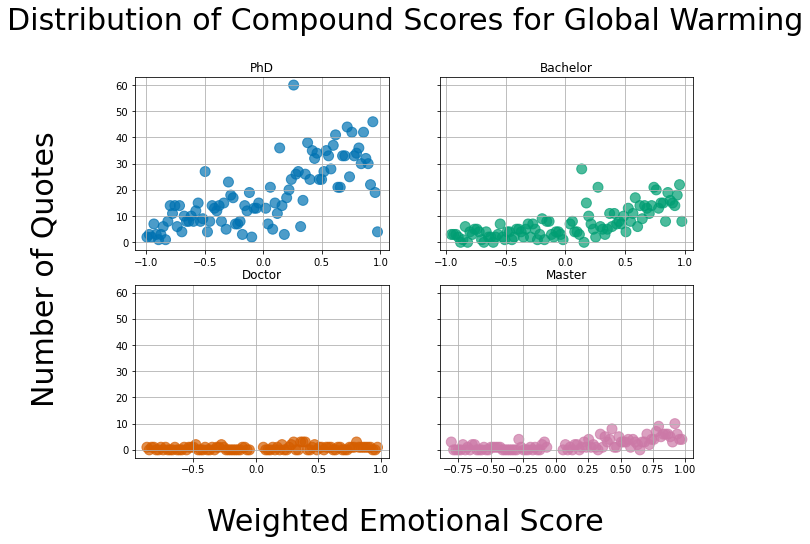

In [460]:
data_phd = plt.hist(gw_at_deg[gw_at_deg['degree'] == 'phd']['compound scores'], alpha =alpha_score,  bins = 100)
data_bachelor = plt.hist(gw_at_deg[gw_at_deg['degree'] == 'bachelor']['compound scores'], alpha =alpha_score,  bins = 100)
data_doctor = plt.hist(gw_at_deg[gw_at_deg['degree'] == 'doctor']['compound scores'], alpha =alpha_score,  bins = 100)
data_master = plt.hist(gw_at_deg[gw_at_deg['degree'] == 'master']['compound scores'], alpha =alpha_score,  bins = 100)


None
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,7), sharey = True)
idx =np.where(np.abs(data_phd[1]) >= 0.02)
axs[0][0].scatter(data_phd[1][idx[0][0:np.shape(idx)[1]-1]], data_phd[0][idx[0][0:np.shape(idx)[1]-1]], alpha = 0.7, s = 100*np.ones(np.shape(idx)[1]-1), color = 'C0')
idx =np.where(np.abs(data_bachelor[1]) >= 0.02)
axs[0][1].scatter(data_bachelor[1][idx[0][0:np.shape(idx)[1]-1]], data_bachelor[0][idx[0][0:np.shape(idx)[1]-1]], alpha = 0.7, s = 100*np.ones(np.shape(idx)[1]-1),  color = 'C1')
idx =np.where(np.abs(data_doctor[1]) >= 0.05)
axs[1][0].scatter(data_doctor[1][idx[0][0:np.shape(idx)[1]-1]], data_doctor[0][idx[0][0:np.shape(idx)[1]-1]], alpha = 0.7, s = 100*np.ones(np.shape(idx)[1]-1), color = 'C2')
idx =np.where(np.abs(data_master[1]) >= 0.05)
axs[1][1].scatter(data_master[1][idx[0][0:np.shape(idx)[1]-1]], data_master[0][idx[0][0:np.shape(idx)[1]-1]], alpha = 0.7, s = 100*np.ones(np.shape(idx)[1]-1), color = 'C3')
axs[0][0].grid()
axs[0][1].grid()
axs[1][0].grid()
axs[1][1].grid()
axs[0][0].title.set_text('PhD')
axs[0][1].title.set_text('Bachelor')
axs[1][0].title.set_text('Doctor')
axs[1][1].title.set_text('Master')

fig.text(0.5, -0.02, 'Weighted Emotional Score', ha='center', fontsize=30)
fig.text(-0.02, 0.5, 'Number of Quotes', va='center', rotation='vertical', fontsize=30)
fig.suptitle('Distribution of Compound Scores for Global Warming', fontsize = 30, x=0.5, y=1.02)




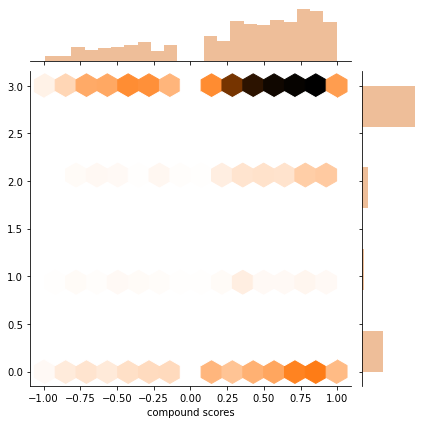

In [494]:

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit( gw_at_deg['degree'])
degrees_num= enc.transform( gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['degree'])


sns.jointplot(gw_at_deg[np.abs(gw_at_deg['compound scores'] ) >=0.1]['compound scores'], degrees_num, kind="hex", color = 'C2', alpha = 1)
              
              
              
              

Text(0.5, 49.99999999999995, 'Weighted Emotional Score')

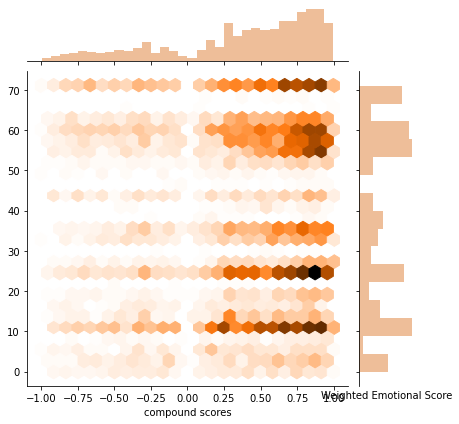

In [498]:

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit( gw_at_rel['religion'])
rel_num= enc.transform( gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['religion'])
nat

sns.jointplot(gw_at_rel[np.abs(gw_at_rel['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
plt.xlabel('Weighted Emotional Score')                       
              
              

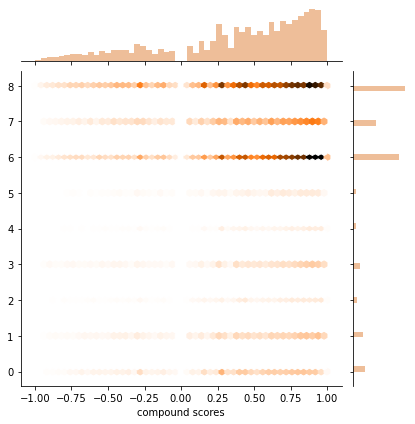

In [522]:

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit( gw_at_nat['nation'])
rel_num= enc.transform( gw_at_nat[ (np.abs(gw_at_nat['compound scores'] ) >=0.05)]['nation'])


sns.jointplot(gw_at_nat[np.abs(gw_at_nat['compound scores'] ) >=0.05]['compound scores'], rel_num, kind="hex", color = 'C2', alpha = 1)
#plt.xlabel('Weighted Emotional Score')                       
              
              